In [167]:
import polars as pl
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [168]:
data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
data = data.rename({"column_188": "label"})

data.describe()

statistic,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,…,column_152,column_153,column_154,column_155,column_156,column_157,column_158,column_159,column_160,column_161,column_162,column_163,column_164,column_165,column_166,column_167,column_168,column_169,column_170,column_171,column_172,column_173,column_174,column_175,column_176,column_177,column_178,column_179,column_180,column_181,column_182,column_183,column_184,column_185,column_186,column_187,label
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,…,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0,87554.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",0.89036,0.75816,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.20355,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.31389,0.318454,0.322087,0.324891,0.326737,0.327817,…,0.027573,0.026875,0.025771,0.024823,0.023932,0.02306,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.01674,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
"""std""",0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.17724,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.21845,0.221486,0.224031,0.225848,0.227133,0.22783,0.228436,0.228871,0.22876,0.228393,0.227472,0.22618,0.224659,0.22311,…,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.05284,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065,0.068638,0.070539,0.069182,0.068293,0.067742,0.070175,0.072993,0.074803,0.075972,0.076923,0.077869,0.079439,0.081911,0.0859375,0.090032,0.094595,0.098901,0.10396,0.109339,0.114754,0.120729,0.127946,0.135961,0.144295,0.151852,0.157895,0.161034,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [169]:
train_data = pl.read_csv("../data/mitbih_train.csv", has_header=False)
train_data = train_data.rename({"column_188": "label"})

test_data = pl.read_csv("../data/mitbih_test.csv", has_header=False)
test_data = test_data.rename({"column_188": "label"})

In [170]:
normal_sample = data.filter(pl.col("label") == 0).sample(1)
atrial_premature_sample = data.filter(pl.col("label") == 1).sample(1)
ventricular_premature_sample = data.filter(pl.col("label") == 2).sample(1)
fusion_sample = data.filter(pl.col("label") == 3).sample(1)
paced_sample = data.filter(pl.col("label") == 4).sample(1)

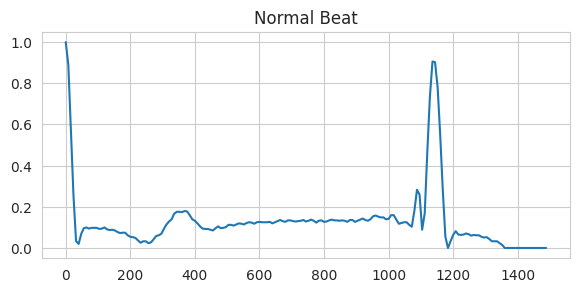

In [171]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=normal_sample.drop("label").to_numpy().flatten())
plt.title("Normal Beat")
plt.show()

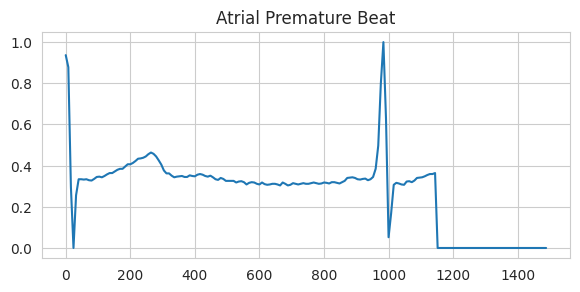

In [172]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=atrial_premature_sample.drop("label").to_numpy().flatten())
plt.title("Atrial Premature Beat")
plt.show()

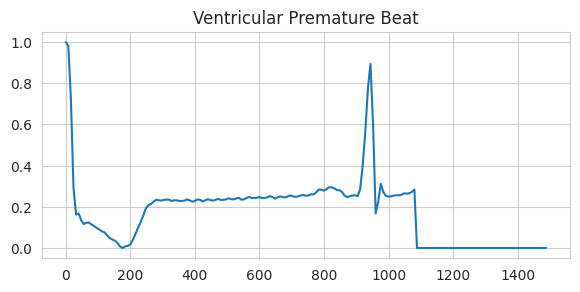

In [173]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=ventricular_premature_sample.drop("label").to_numpy().flatten())
plt.title("Ventricular Premature Beat")
plt.show()

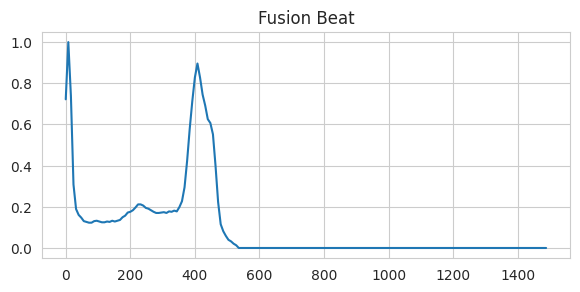

In [174]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=fusion_sample.drop("label").to_numpy().flatten())
plt.title("Fusion Beat")
plt.show()

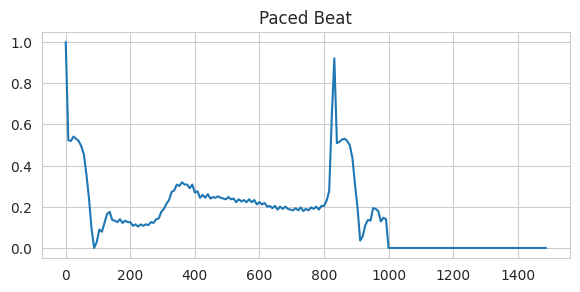

In [175]:
# plotting
x_ms = np.array(range(187)) * 8
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(x=x_ms, y=paced_sample.drop("label").to_numpy().flatten())
plt.title("Paced Beat")
plt.show()

# Performance


In [176]:
results = pl.read_csv("../ecg_model_performance_results.csv")
results_grouped = results.group_by(["model_type", "num_conv_layers"]).agg(
    [
        pl.mean("test_accuracy").alias("mean_test_accuracy"),
        pl.mean("test_loss").alias("mean_test_loss"),
        pl.mean("f1_macro").alias("mean_f1_macro"),
        pl.mean("precision_macro").alias("mean_precision_macro"),
        pl.mean("recall_macro").alias("mean_recall_macro"),
        pl.mean("roc_auc_ovr").alias("mean_roc_auc_ovr"),
        pl.mean("roc_auc_ovo").alias("mean_roc_auc_ovo"),
    ]
)
results_grouped

model_type,num_conv_layers,mean_test_accuracy,mean_test_loss,mean_f1_macro,mean_precision_macro,mean_recall_macro,mean_roc_auc_ovr,mean_roc_auc_ovo
str,i64,f64,f64,f64,f64,f64,f64,f64
"""ECGCNN""",1,0.771158,0.614664,0.563986,0.514439,0.822834,0.950711,0.966504
"""ECGCNN""",5,0.894857,0.313469,0.70531,0.646023,0.887265,0.97722,0.983614
"""ECGCNN""",3,0.883848,0.380753,0.678975,0.620731,0.881624,0.973188,0.981069
"""ECGCNN_VGG""",1,0.749196,0.643692,0.547893,0.500268,0.815287,0.948827,0.964796
"""ECGCNN""",2,0.806203,0.512694,0.607488,0.559138,0.850072,0.960267,0.972098
"""ECGCNN""",4,0.864489,0.395183,0.664766,0.611117,0.880541,0.974517,0.982163
"""ECGCNN_VGG""",4,0.870674,0.397537,0.665696,0.610135,0.869996,0.969921,0.979043
"""ECGCNN_VGG""",5,0.877663,0.40527,0.673441,0.614724,0.874075,0.972223,0.980923
"""ECGCNN_VGG""",3,0.870985,0.365697,0.668539,0.616315,0.873585,0.973109,0.980371


In [177]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
def output_metrics(metric_filename):
    with open(metric_filename, "r") as f:
        metrics_data = json.load(f)

    # Set style
    sns.set_style("whitegrid")
    plt.rcParams["figure.figsize"] = (15, 10)

    # Extract data for easier manipulation
    seeds = [entry["seed"] for entry in metrics_data]
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]

    class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

    # 1. Overall Performance Metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    axes[0, 0].plot(seeds, accuracies, marker="o", linewidth=2, markersize=8)
    axes[0, 0].set_xlabel("Seed")
    axes[0, 0].set_ylabel("Accuracy")
    axes[0, 0].set_title("Test Accuracy by Seed")
    axes[0, 0].axhline(
        y=np.mean(accuracies),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(accuracies):.4f}",
    )
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    axes[0, 1].plot(
        seeds, f1_macros, marker="s", linewidth=2, markersize=8, color="green"
    )
    axes[0, 1].set_xlabel("Seed")
    axes[0, 1].set_ylabel("F1 Macro")
    axes[0, 1].set_title("F1 Macro Score by Seed")
    axes[0, 1].axhline(
        y=np.mean(f1_macros),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(f1_macros):.4f}",
    )
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    axes[1, 0].plot(
        seeds, losses, marker="^", linewidth=2, markersize=8, color="orange"
    )
    axes[1, 0].set_xlabel("Seed")
    axes[1, 0].set_ylabel("Loss")
    axes[1, 0].set_title("Test Loss by Seed")
    axes[1, 0].axhline(
        y=np.mean(losses),
        color="r",
        linestyle="--",
        label=f"Mean: {np.mean(losses):.4f}",
    )
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    axes[1, 1].bar(range(len(seeds)), training_times, color="purple", alpha=0.7)
    axes[1, 1].set_xlabel("Run Index")
    axes[1, 1].set_ylabel("Training Time (seconds)")
    axes[1, 1].set_title("Training Time per Run")
    axes[1, 1].set_xticks(range(len(seeds)))
    axes[1, 1].set_xticklabels([f"Seed {s}" for s in seeds], rotation=45)
    axes[1, 1].grid(True, alpha=0.3, axis="y")

    plt.tight_layout()
    plt.show()

    # 2. Aggregate Confusion Matrix
    confusion_matrices = [
        np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics_data
    ]
    mean_cm = np.mean(confusion_matrices, axis=0)
    std_cm = np.std(confusion_matrices, axis=0)

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Mean confusion matrix
    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0],
    )
    axes[0].set_title("Mean Confusion Matrix\n(Averaged across all seeds)")
    axes[0].set_ylabel("True Label")
    axes[0].set_xlabel("Predicted Label")

    # Std confusion matrix
    sns.heatmap(
        std_cm,
        annot=True,
        fmt=".1f",
        cmap="Reds",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[1],
    )
    axes[1].set_title(
        "Standard Deviation of Confusion Matrix\n(Variability across seeds)"
    )
    axes[1].set_ylabel("True Label")
    axes[1].set_xlabel("Predicted Label")

    plt.tight_layout()
    plt.show()

    # 3. Per-Class Performance
    f1_per_class = np.array(
        [entry["metrics"]["f1_per_class"] for entry in metrics_data]
    )
    precision_per_class = np.array(
        [entry["metrics"]["precision_per_class"] for entry in metrics_data]
    )
    recall_per_class = np.array(
        [entry["metrics"]["recall_per_class"] for entry in metrics_data]
    )

    mean_f1 = np.mean(f1_per_class, axis=0)
    std_f1 = np.std(f1_per_class, axis=0)
    mean_precision = np.mean(precision_per_class, axis=0)
    std_precision = np.std(precision_per_class, axis=0)
    mean_recall = np.mean(recall_per_class, axis=0)
    std_recall = np.std(recall_per_class, axis=0)

    x = np.arange(len(class_names))
    width = 0.2

    fig, ax = plt.subplots(figsize=(16, 6))

    bars1 = ax.bar(
        x - 1.5 * width,
        mean_f1,
        width,
        yerr=std_f1,
        label="F1 Score",
        capsize=5,
        alpha=0.8,
    )
    bars2 = ax.bar(
        x - 0.5 * width,
        mean_precision,
        width,
        yerr=std_precision,
        label="Precision",
        capsize=5,
        alpha=0.8,
    )
    bars3 = ax.bar(
        x + 0.5 * width,
        mean_recall,
        width,
        yerr=std_recall,
        label="Recall",
        capsize=5,
        alpha=0.8,
    )

    ax.set_xlabel("Class")
    ax.set_ylabel("Score")
    ax.set_title("Per-Class Performance Metrics (Mean ± Std)")
    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_ylim([0.6, 1.0])

    plt.tight_layout()
    plt.show()

    # 4. Per-Class Performance Heatmap
    fig, axes = plt.subplots(1, 3, figsize=(24, 5))

    metrics_dict = {
        "F1 Score": mean_f1,
        "Precision": mean_precision,
        "Recall": mean_recall,
    }

    for idx, (metric_name, values) in enumerate(metrics_dict.items()):
        # Reshape for heatmap
        data = values.reshape(1, -1)
        sns.heatmap(
            data,
            annot=True,
            fmt=".3f",
            cmap="RdYlGn",
            xticklabels=class_names,
            yticklabels=[""],
            ax=axes[idx],
            vmin=0.7,
            vmax=1.0,
            cbar_kws={"label": "Score"},
        )
        axes[idx].set_title(f"{metric_name} by Class")

    plt.tight_layout()
    plt.show()

    # 5. ROC AUC Comparison
    roc_auc_ovr = [entry["metrics"]["roc_auc_ovr"] for entry in metrics_data]
    roc_auc_ovo = [entry["metrics"]["roc_auc_ovo"] for entry in metrics_data]

    fig, ax = plt.subplots(figsize=(10, 6))

    x_pos = np.arange(len(seeds))
    width = 0.35

    bars1 = ax.bar(
        x_pos - width / 2, roc_auc_ovr, width, label="One-vs-Rest", alpha=0.8
    )
    bars2 = ax.bar(x_pos + width / 2, roc_auc_ovo, width, label="One-vs-One", alpha=0.8)

    ax.set_xlabel("Seed")
    ax.set_ylabel("ROC AUC Score")
    ax.set_title("ROC AUC Scores by Seed (OvR vs OvO)")
    ax.set_xticks(x_pos)
    ax.set_xticklabels([f"Seed {s}" for s in seeds])
    ax.legend()
    ax.grid(True, alpha=0.3, axis="y")
    ax.set_ylim([0.98, 0.995])

    plt.tight_layout()
    plt.show()

    # 6. Summary Statistics Table
    summary_stats = pd.DataFrame(
        {
            "Metric": [
                "Accuracy",
                "F1 Macro",
                "Precision",
                "Recall",
                "Specificity",
                "Loss",
                "ROC AUC (OvR)",
                "ROC AUC (OvO)",
                "Training Time (s)",
            ],
            "Mean": [
                np.mean(accuracies),
                np.mean(f1_macros),
                np.mean(
                    [entry["metrics"]["precision_macro"] for entry in metrics_data]
                ),
                np.mean([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.mean(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.mean(losses),
                np.mean(roc_auc_ovr),
                np.mean(roc_auc_ovo),
                np.mean(training_times),
            ],
            "Std": [
                np.std(accuracies),
                np.std(f1_macros),
                np.std([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.std([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.std(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.std(losses),
                np.std(roc_auc_ovr),
                np.std(roc_auc_ovo),
                np.std(training_times),
            ],
            "Min": [
                np.min(accuracies),
                np.min(f1_macros),
                np.min([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.min([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.min(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.min(losses),
                np.min(roc_auc_ovr),
                np.min(roc_auc_ovo),
                np.min(training_times),
            ],
            "Max": [
                np.max(accuracies),
                np.max(f1_macros),
                np.max([entry["metrics"]["precision_macro"] for entry in metrics_data]),
                np.max([entry["metrics"]["recall_macro"] for entry in metrics_data]),
                np.max(
                    [entry["metrics"]["specificity_macro"] for entry in metrics_data]
                ),
                np.max(losses),
                np.max(roc_auc_ovr),
                np.max(roc_auc_ovo),
                np.max(training_times),
            ],
        }
    )

    print("\n" + "=" * 80)
    print("SUMMARY STATISTICS")
    print("=" * 80)
    print(summary_stats.to_string(index=False))
    print("=" * 80)

    # 7. Per-Class Metrics Table
    per_class_df = pd.DataFrame(
        {
            "Class": class_names,
            "F1 (mean±std)": [f"{m:.3f}±{s:.3f}" for m, s in zip(mean_f1, std_f1)],
            "Precision (mean±std)": [
                f"{m:.3f}±{s:.3f}" for m, s in zip(mean_precision, std_precision)
            ],
            "Recall (mean±std)": [
                f"{m:.3f}±{s:.3f}" for m, s in zip(mean_recall, std_recall)
            ],
        }
    )

    print("\n" + "=" * 80)
    print("PER-CLASS METRICS")
    print("=" * 80)
    print(per_class_df.to_string(index=False))
    print("=" * 80)

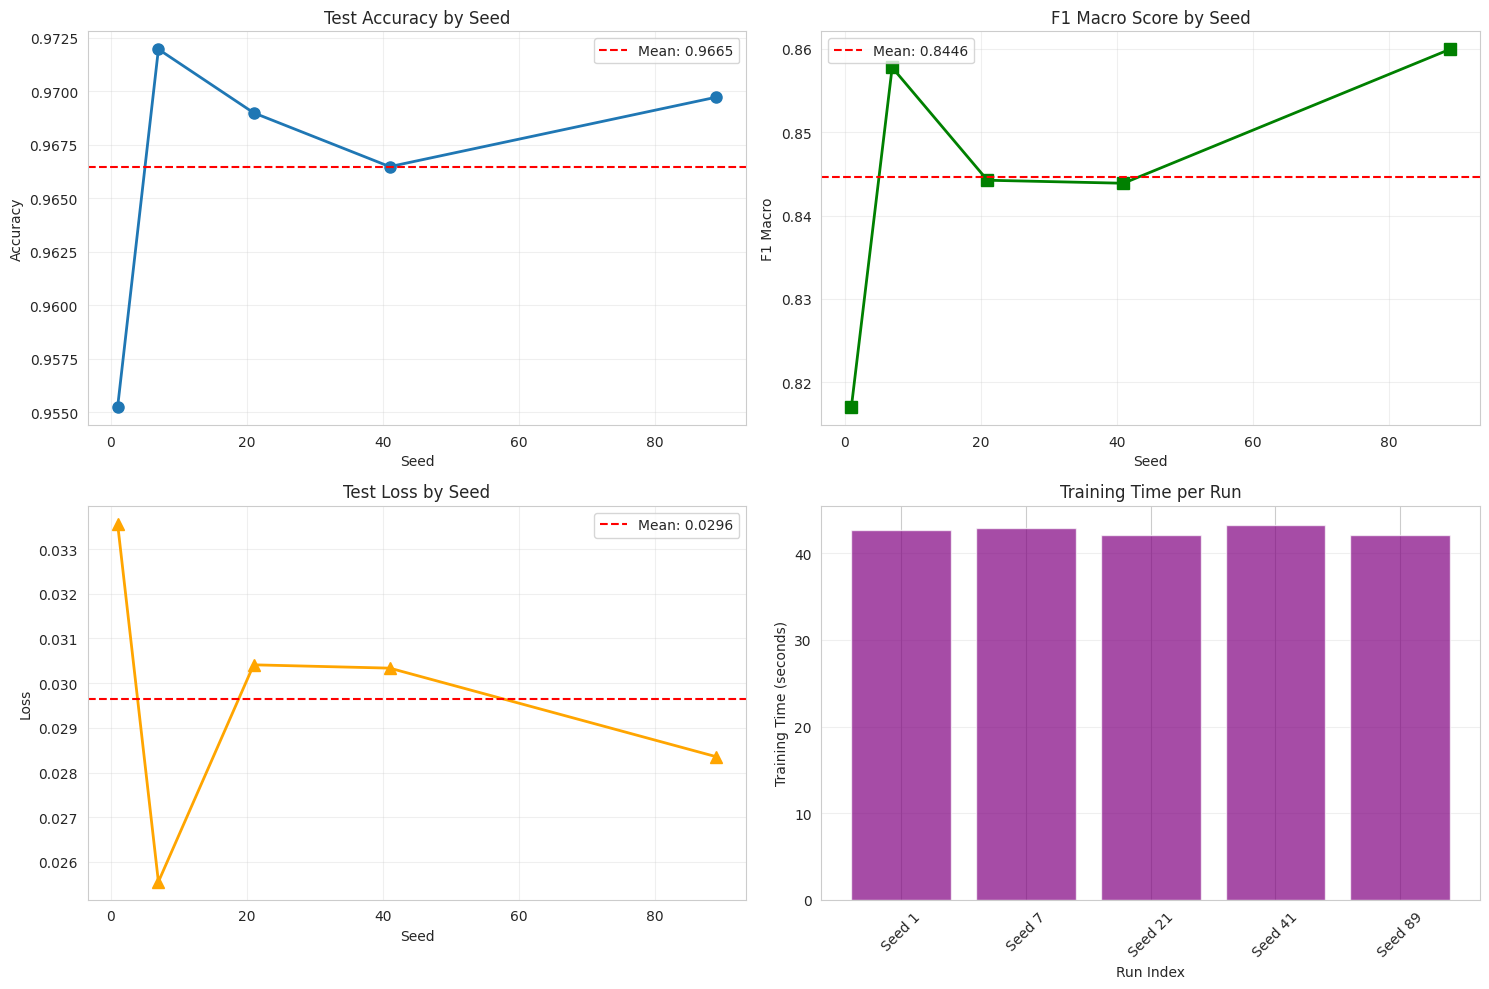

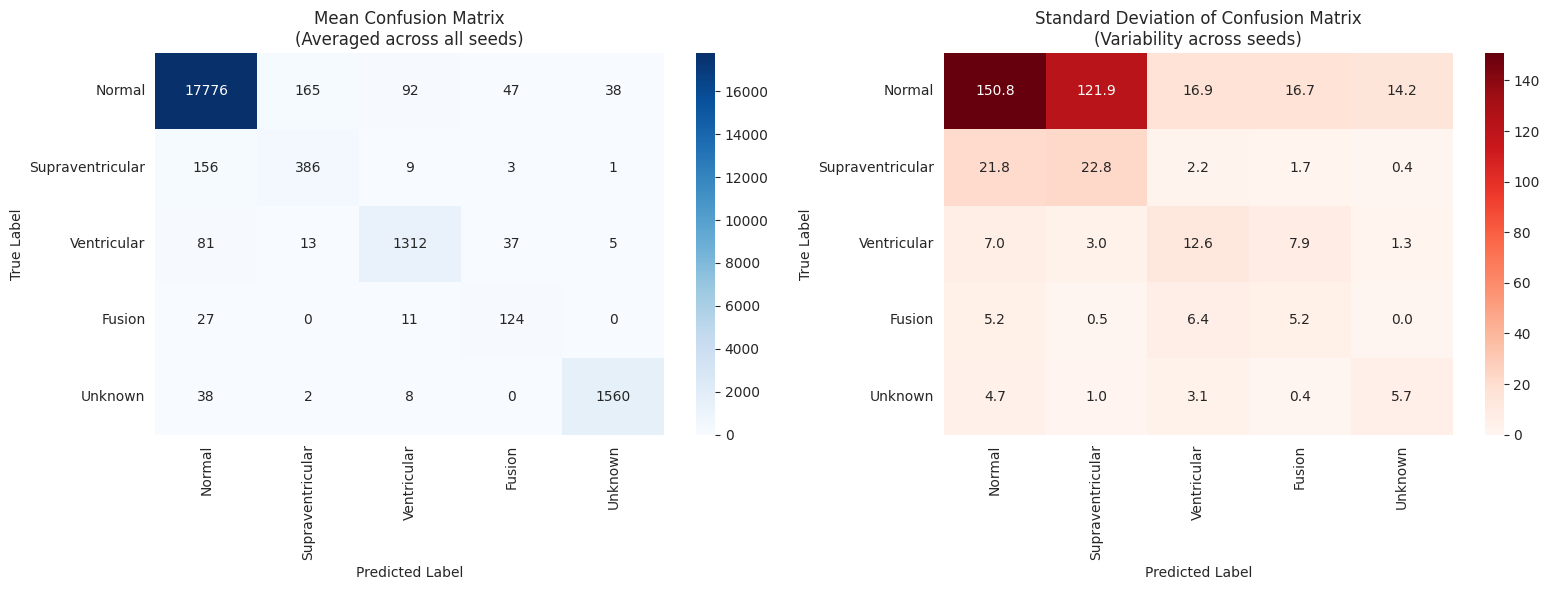

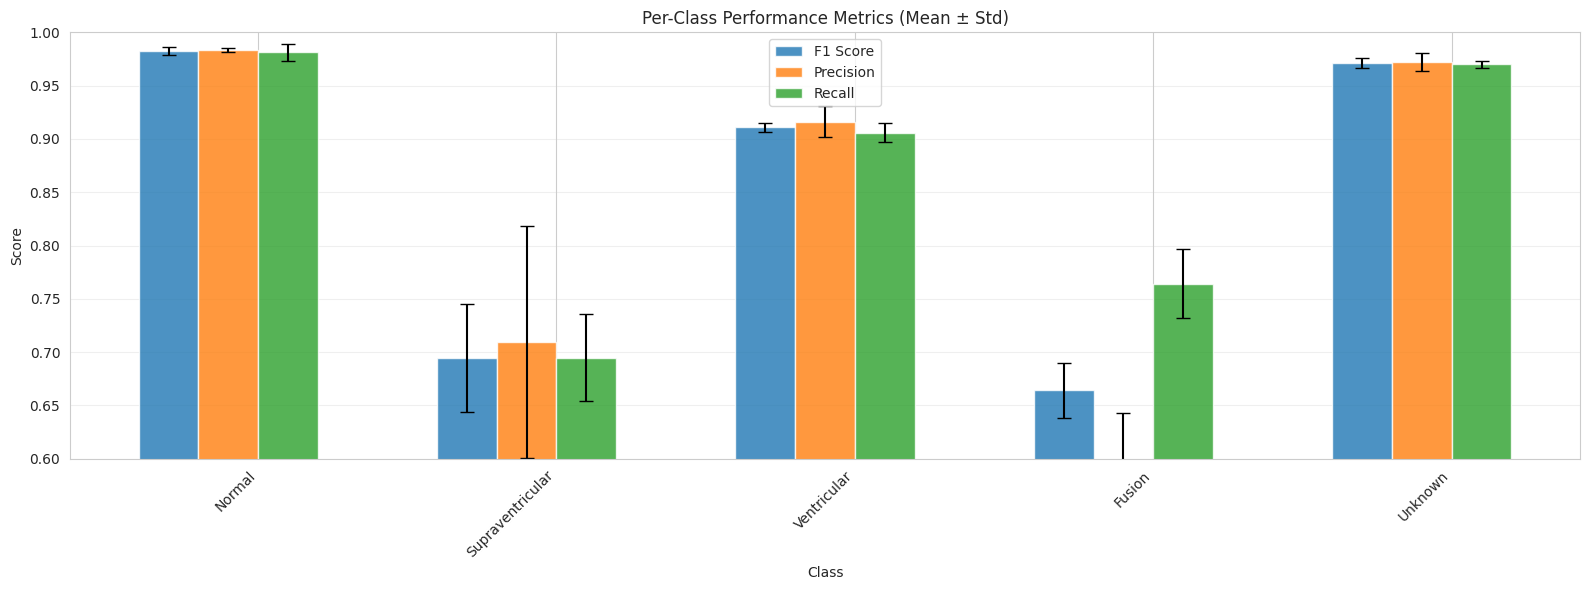

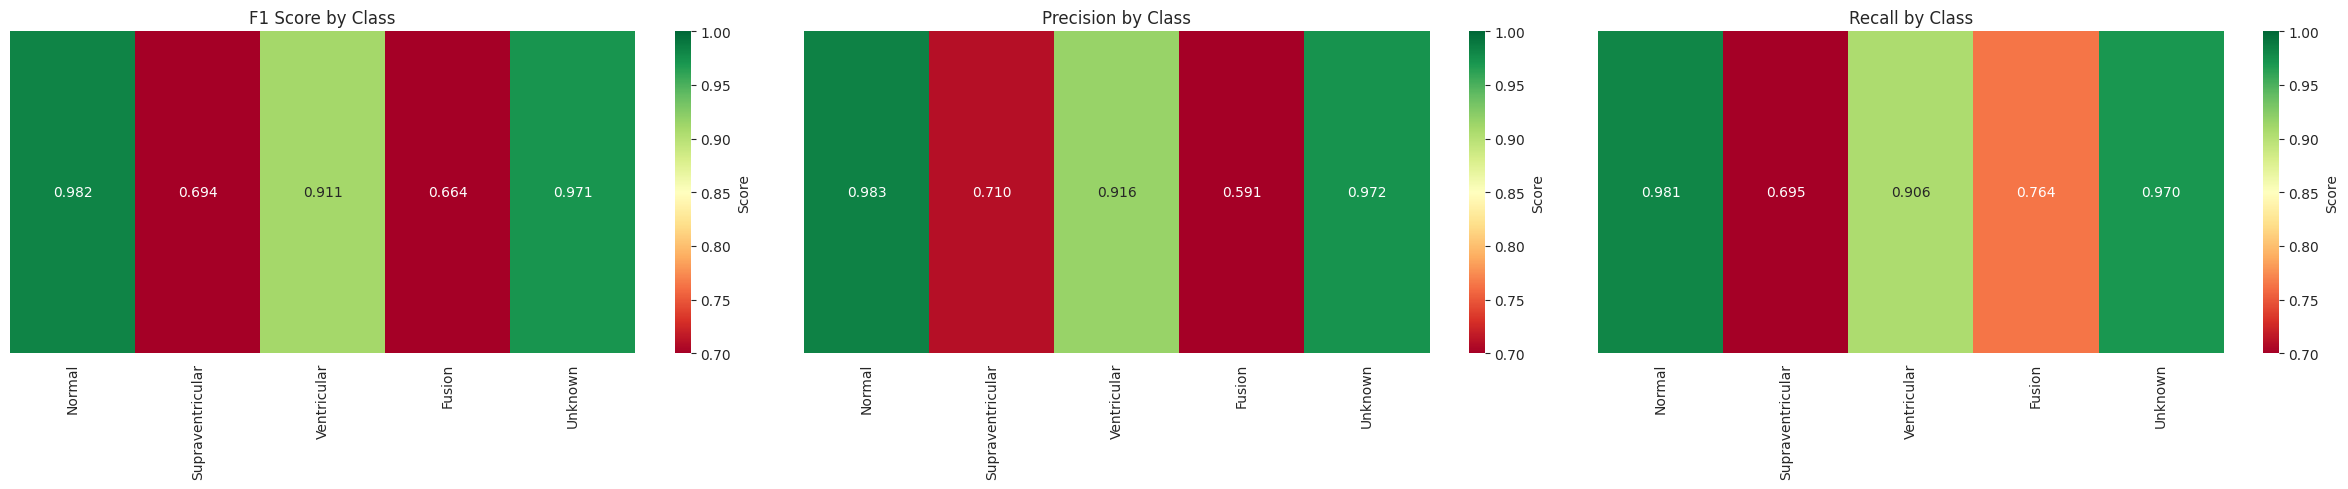

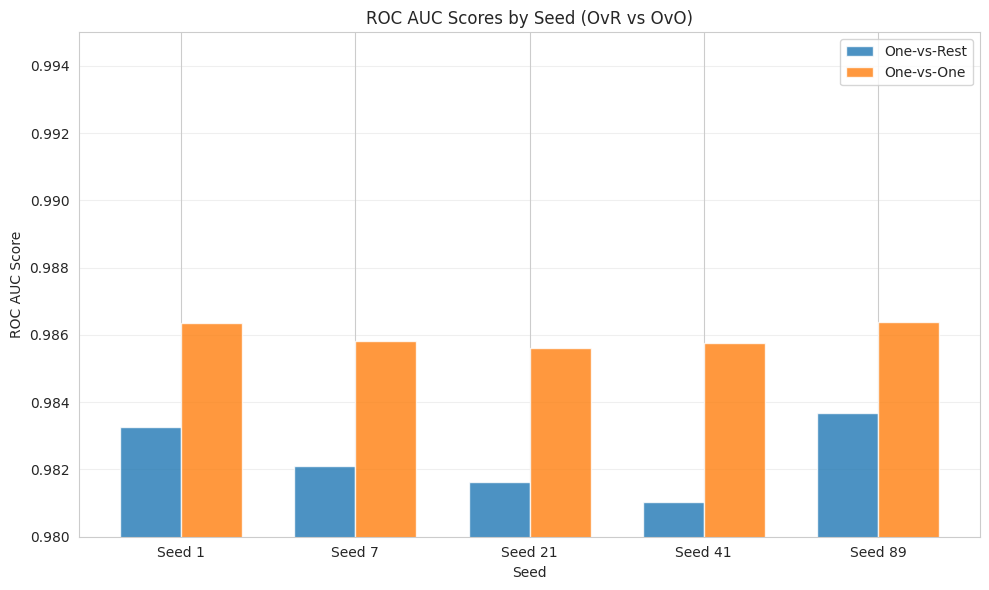


SUMMARY STATISTICS
           Metric      Mean      Std       Min       Max
         Accuracy  0.966472 0.005885  0.955235  0.971953
         F1 Macro  0.844563 0.015313  0.816985  0.859955
        Precision  0.834445 0.030673  0.777963  0.865823
           Recall  0.863252 0.007499  0.854351  0.876101
      Specificity  0.979925 0.000953  0.979101  0.981753
             Loss  0.029644 0.002640  0.025556  0.033567
    ROC AUC (OvR)  0.982339 0.000987  0.981027  0.983670
    ROC AUC (OvO)  0.985981 0.000319  0.985618  0.986386
Training Time (s) 42.622969 0.461644 42.114410 43.321408

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.982±0.004          0.983±0.002       0.981±0.008
Supraventricular   0.694±0.051          0.710±0.109       0.695±0.041
     Ventricular   0.911±0.004          0.916±0.014       0.906±0.009
          Fusion   0.664±0.026          0.591±0.052       0.764±0.032
         Unknown   0.971±0.005          0

In [178]:
output_metrics("../metrics_ECGCNN.json")

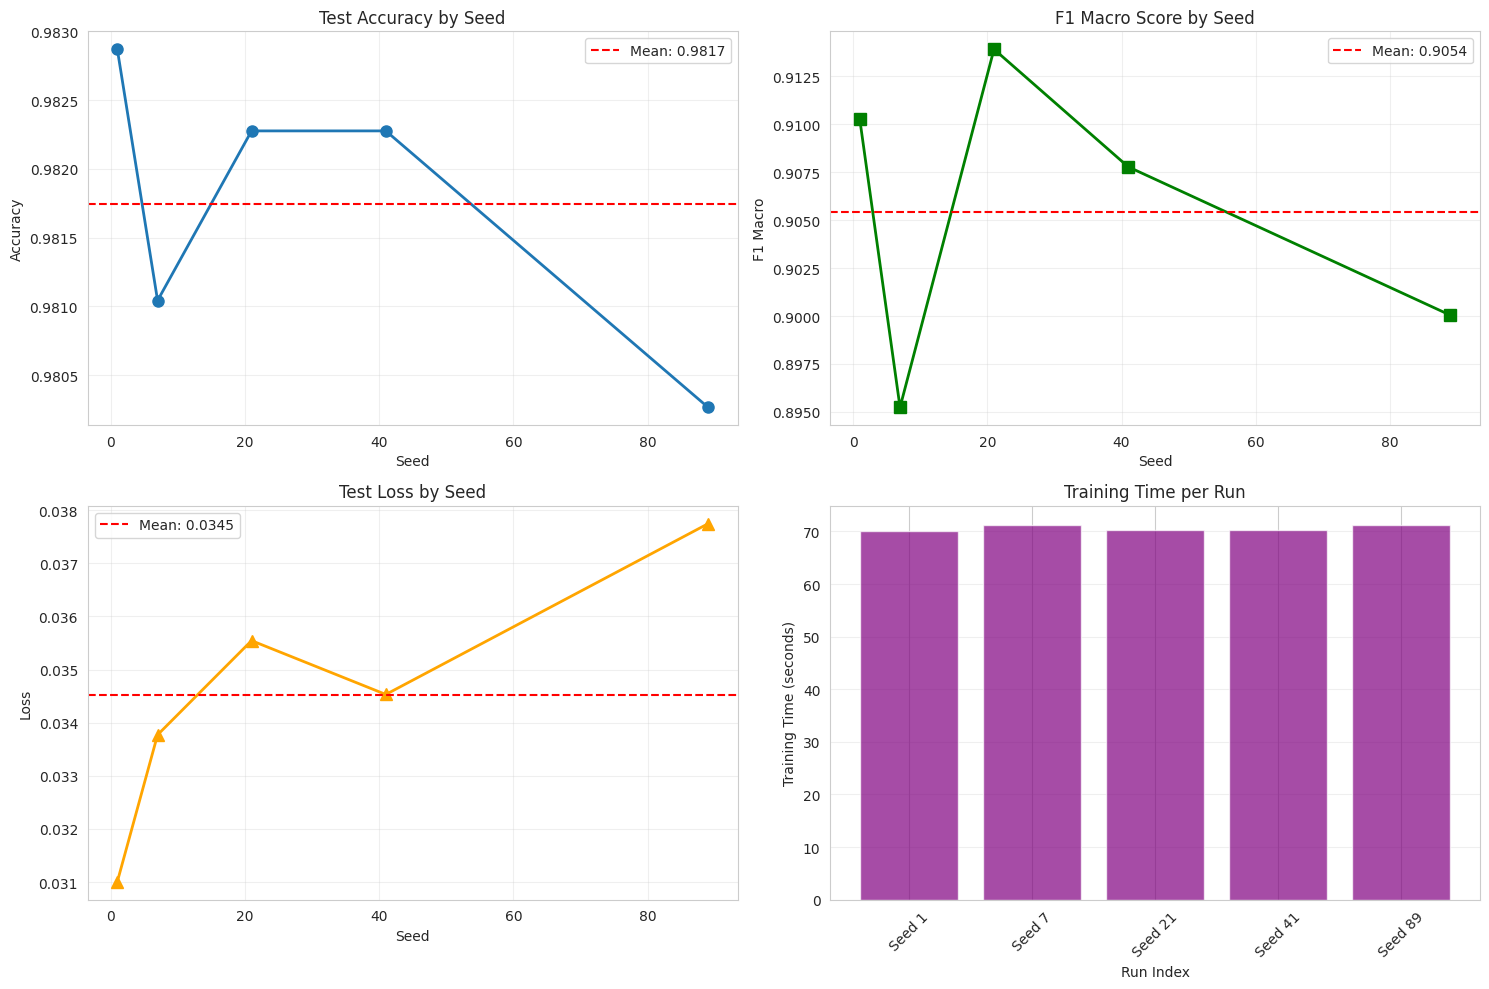

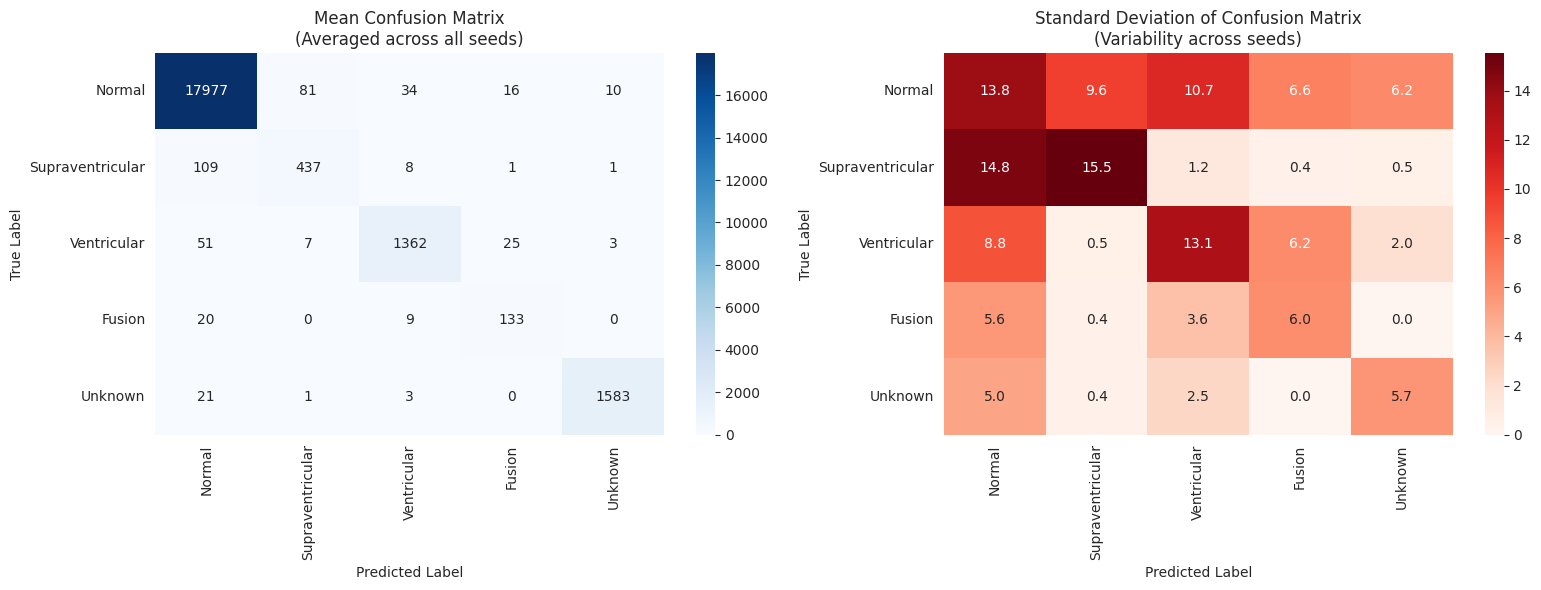

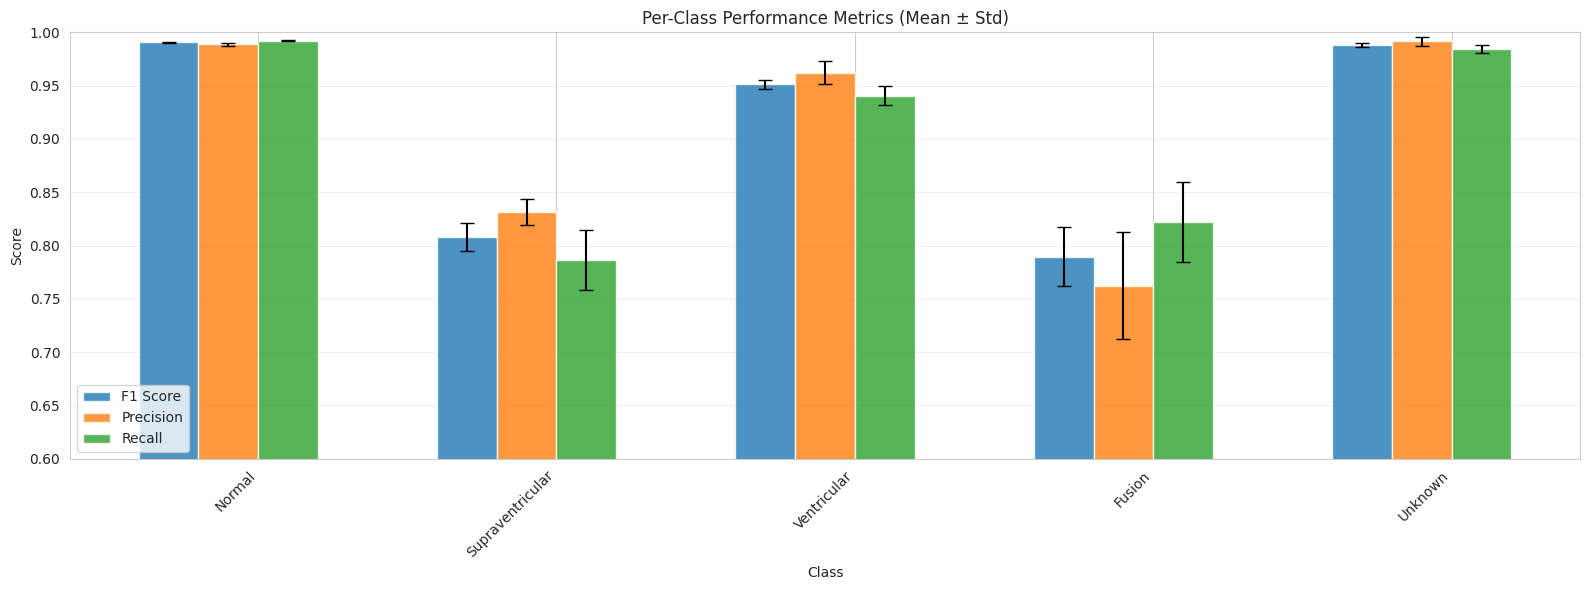

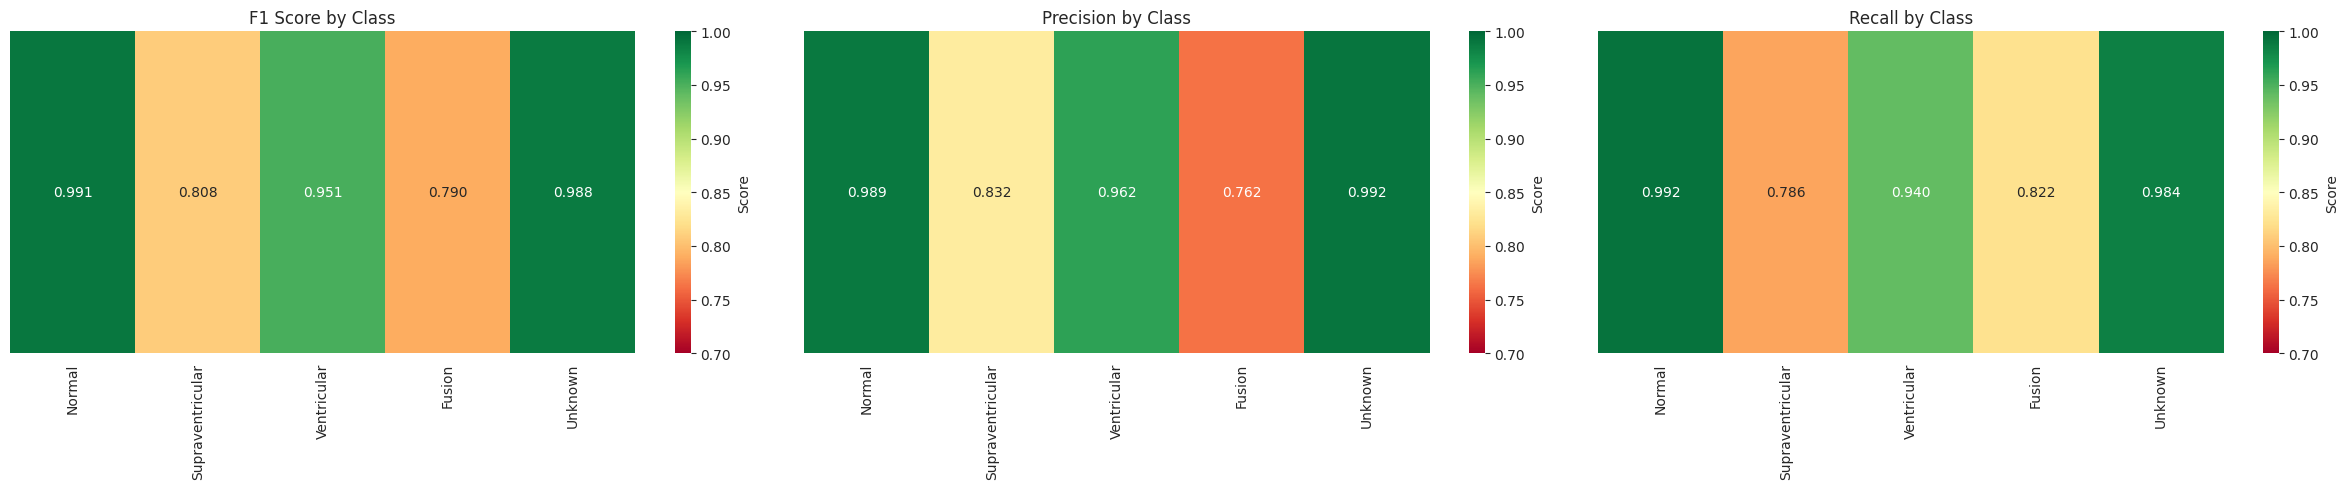

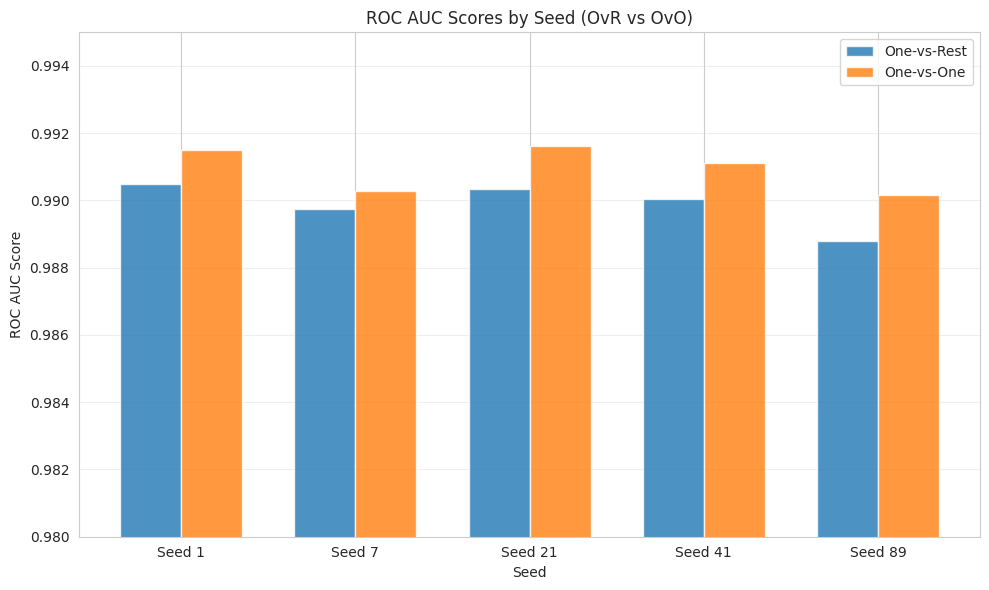


SUMMARY STATISTICS
           Metric      Mean      Std       Min       Max
         Accuracy  0.981747 0.000950  0.980267  0.982870
         F1 Macro  0.905450 0.006838  0.895241  0.913915
        Precision  0.907340 0.007594  0.899779  0.921261
           Recall  0.905141 0.012974  0.888775  0.920027
      Specificity  0.987456 0.001370  0.985544  0.989355
             Loss  0.034520 0.002207  0.031006  0.037745
    ROC AUC (OvR)  0.989881 0.000597  0.988795  0.990481
    ROC AUC (OvO)  0.990936 0.000610  0.990154  0.991616
Training Time (s) 70.648170 0.488026 70.153174 71.300998

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.991±0.001          0.989±0.001       0.992±0.001
Supraventricular   0.808±0.013          0.832±0.013       0.786±0.028
     Ventricular   0.951±0.004          0.962±0.011       0.940±0.009
          Fusion   0.790±0.027          0.762±0.050       0.822±0.037
         Unknown   0.988±0.002          0

In [179]:
output_metrics("../metrics_ECGCNN_1M.json")

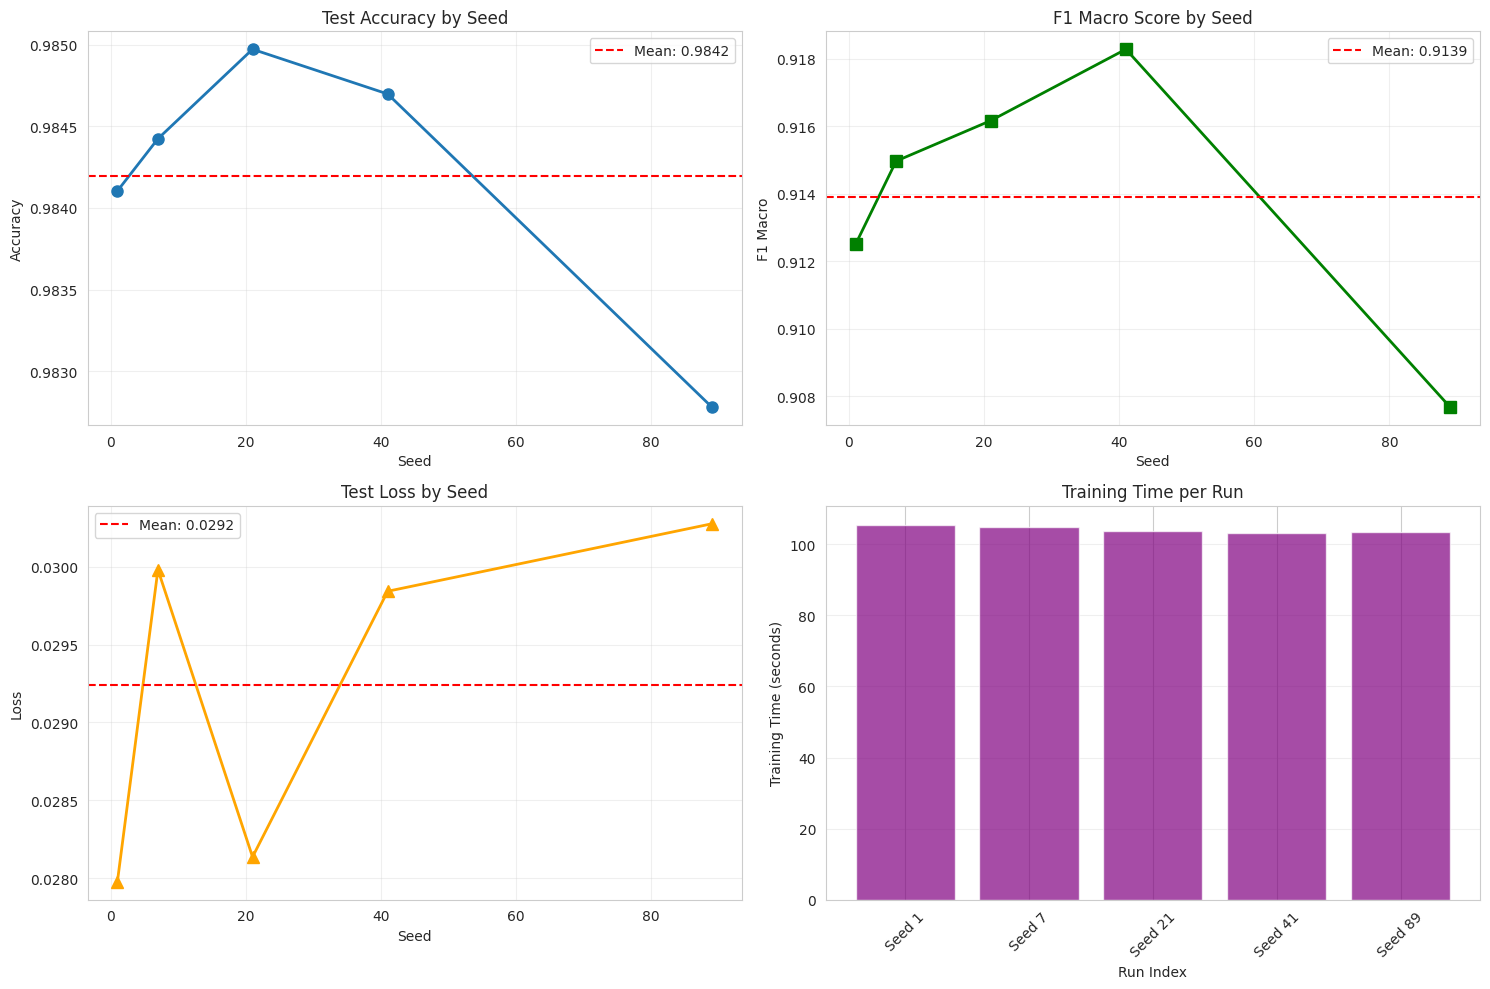

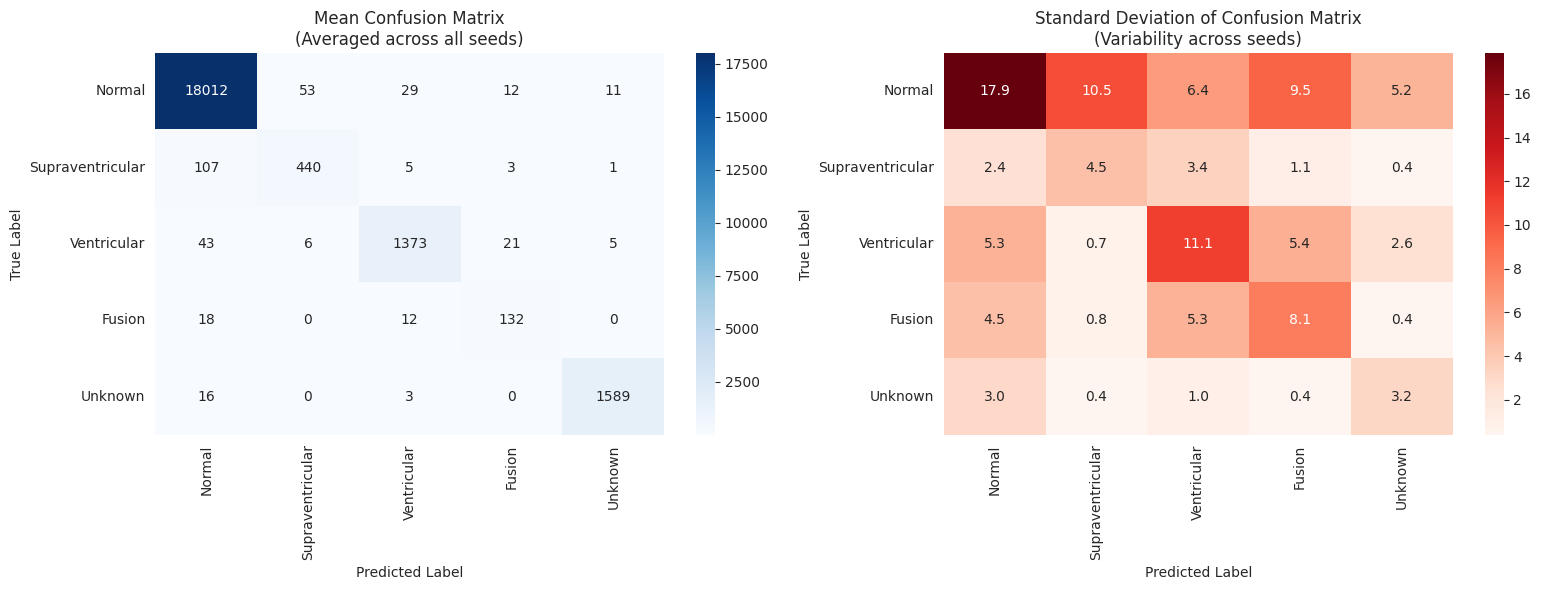

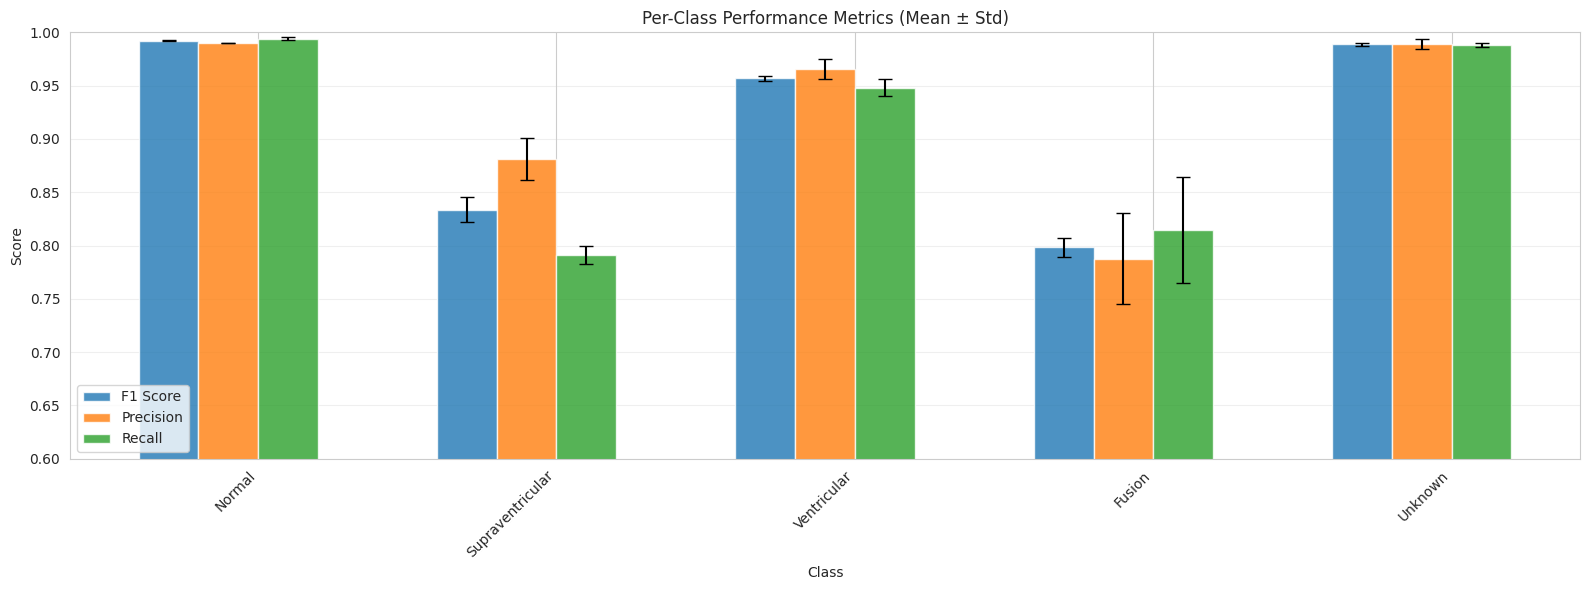

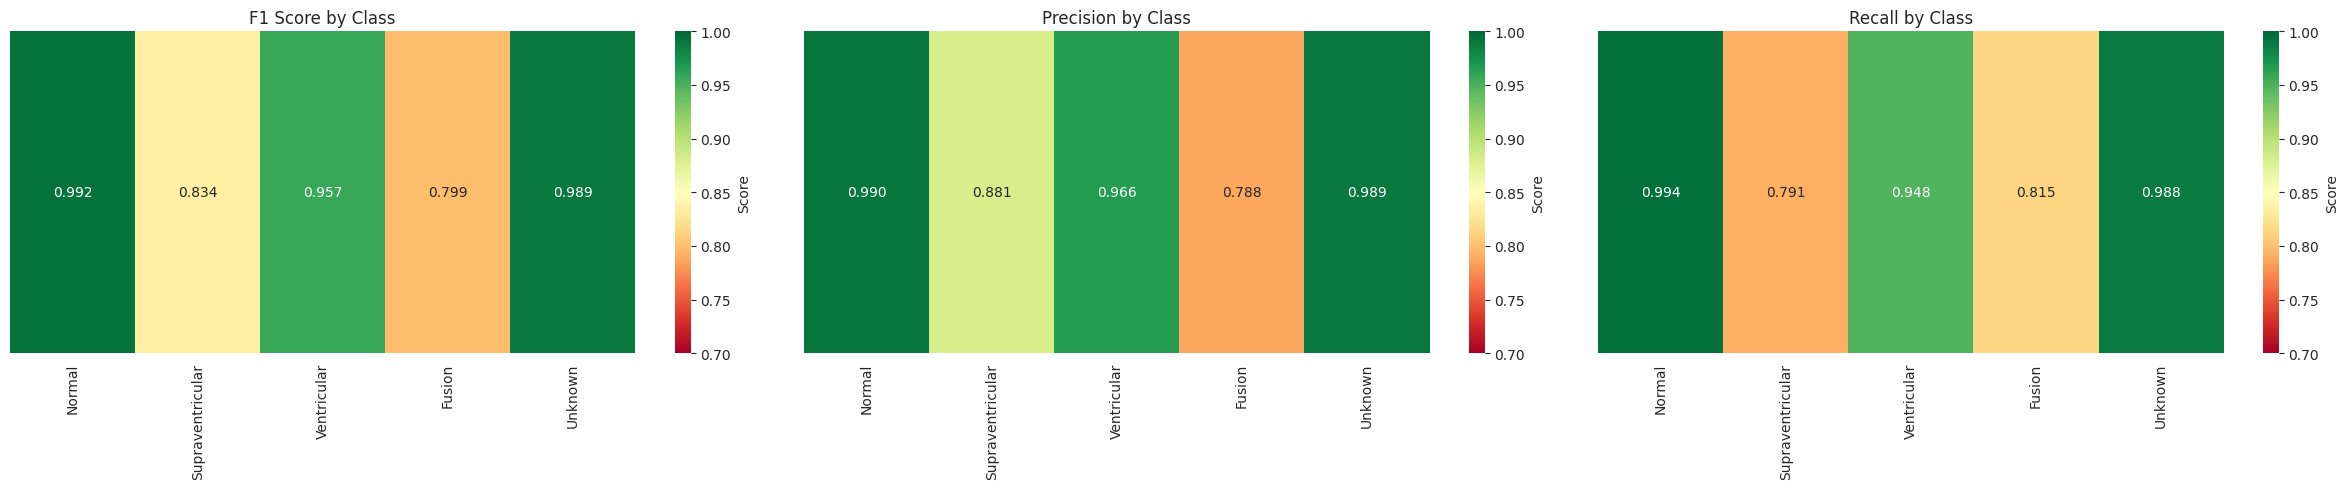

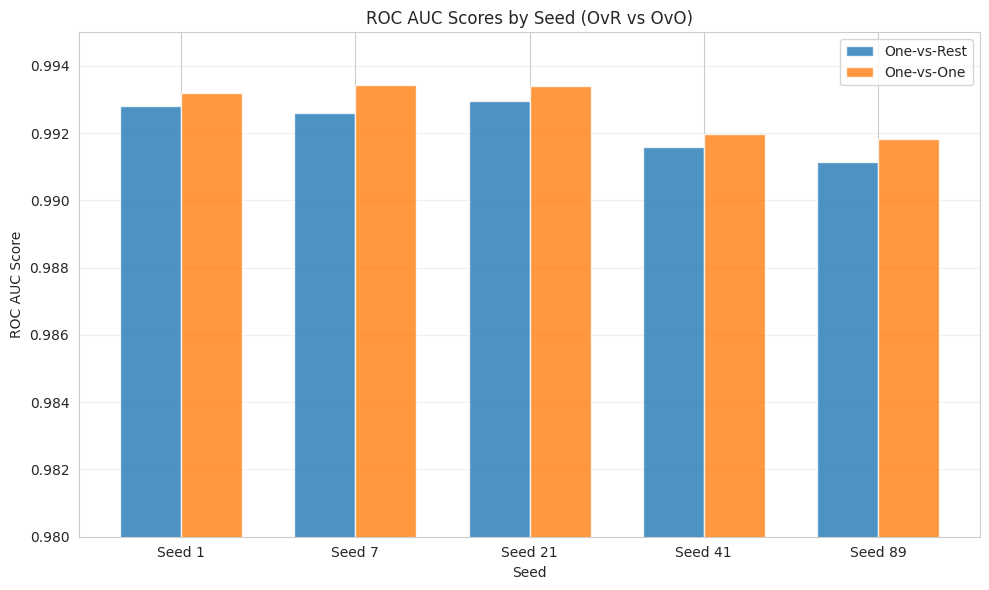


SUMMARY STATISTICS
           Metric       Mean      Std        Min        Max
         Accuracy   0.984195 0.000764   0.982779   0.984972
         F1 Macro   0.913924 0.003639   0.907678   0.918288
        Precision   0.922797 0.005994   0.911453   0.928649
           Recall   0.907249 0.010007   0.894273   0.923667
      Specificity   0.988726 0.000229   0.988426   0.989071
             Loss   0.029243 0.000981   0.027976   0.030278
    ROC AUC (OvR)   0.992220 0.000720   0.991135   0.992960
    ROC AUC (OvO)   0.992768 0.000711   0.991836   0.993431
Training Time (s) 104.116306 0.903774 103.257741 105.523710

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.992±0.000          0.990±0.000       0.994±0.001
Supraventricular   0.834±0.012          0.881±0.020       0.791±0.008
     Ventricular   0.957±0.002          0.966±0.009       0.948±0.008
          Fusion   0.799±0.009          0.788±0.042       0.815±0.050
         Un

In [180]:
output_metrics("../metrics_ECGCNN_3M.json")

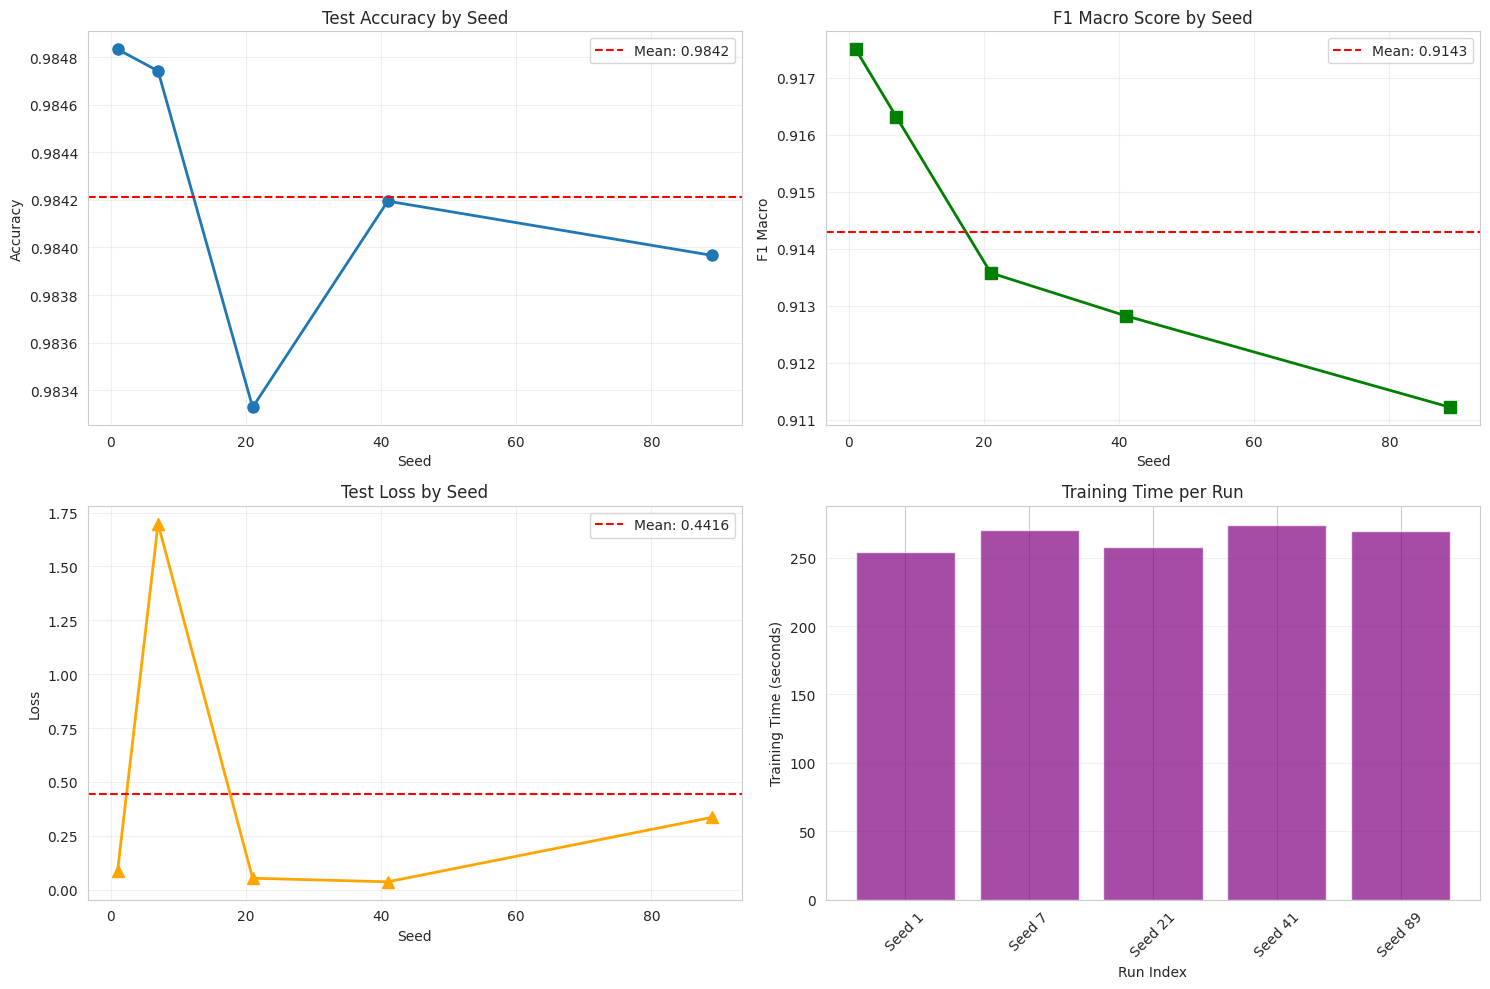

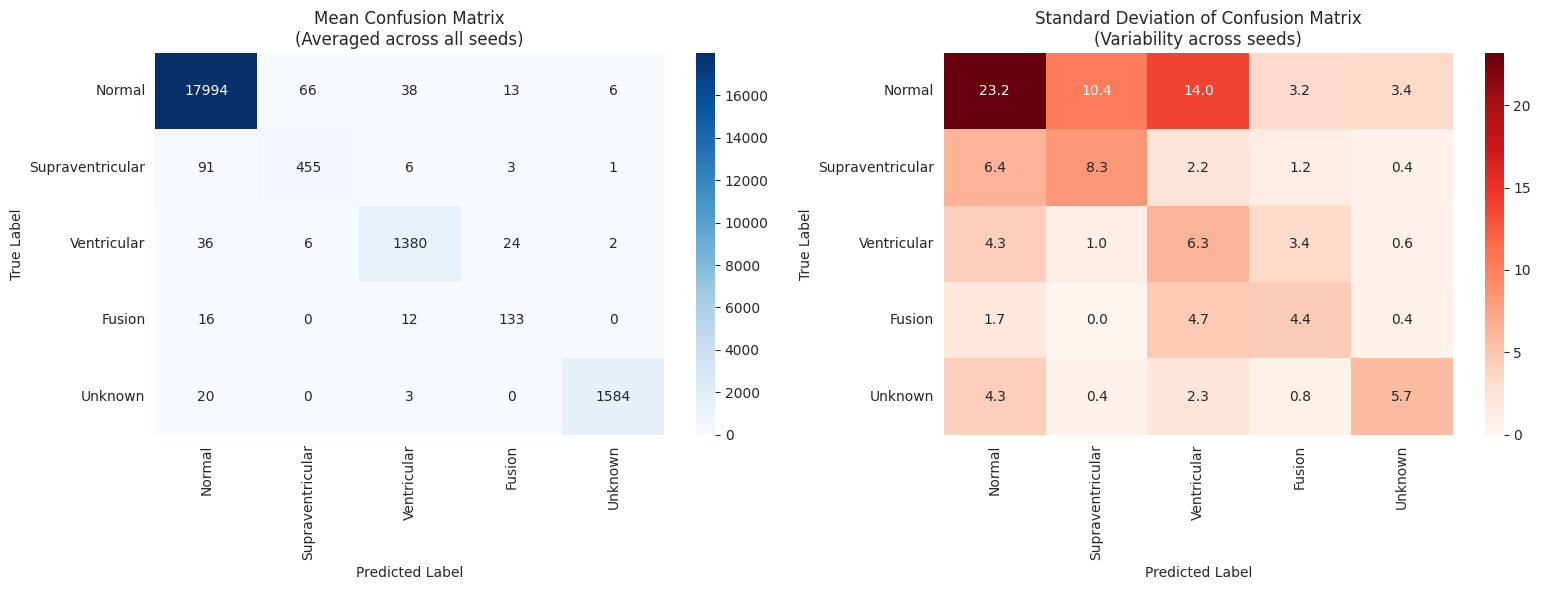

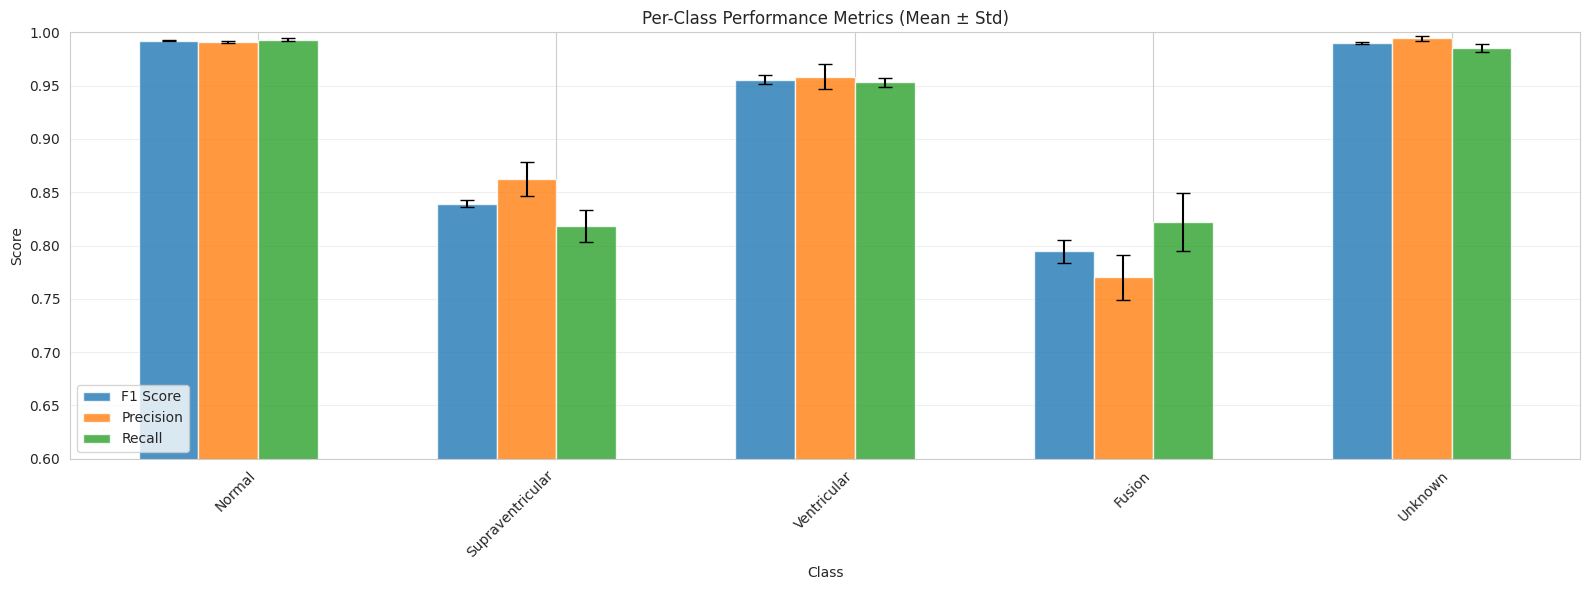

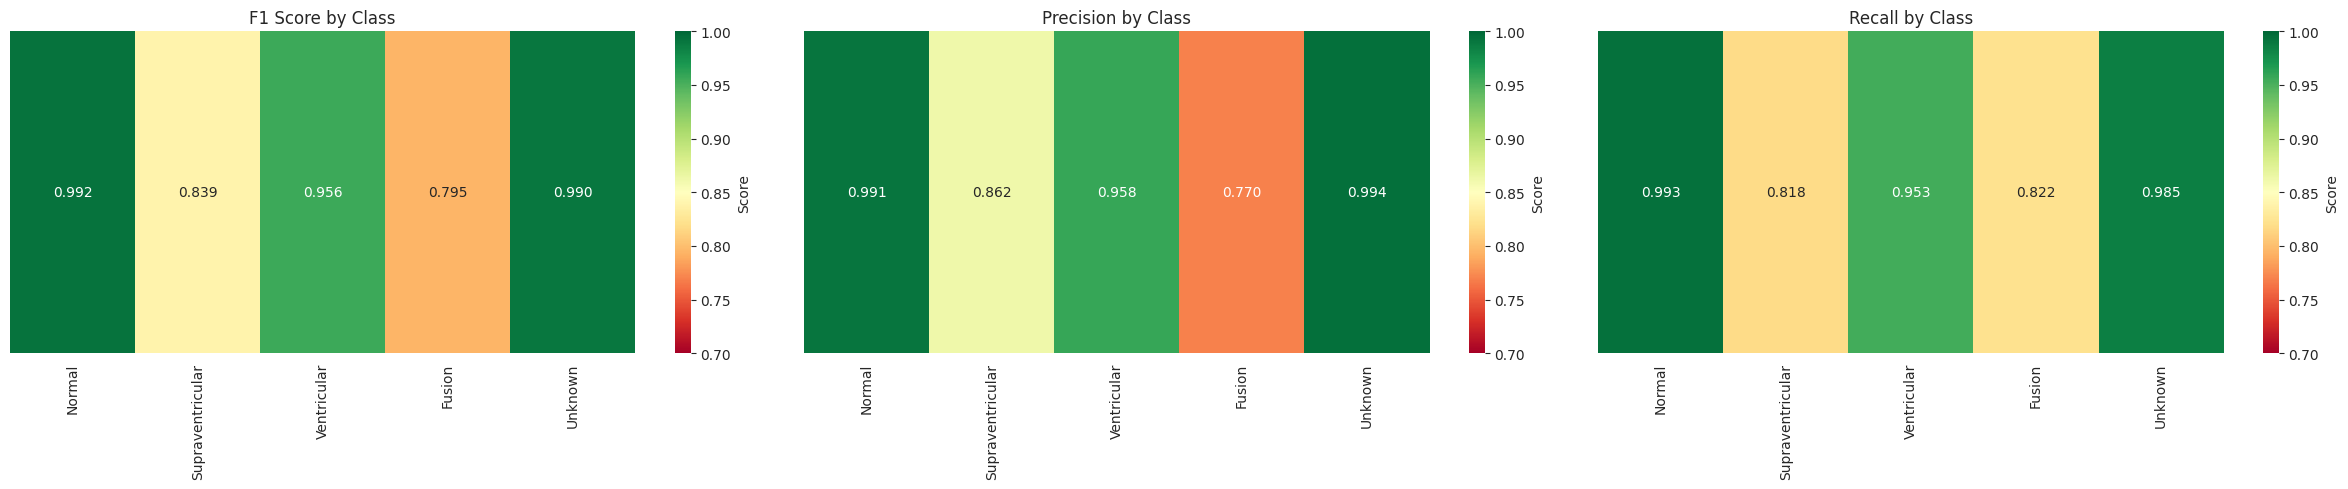

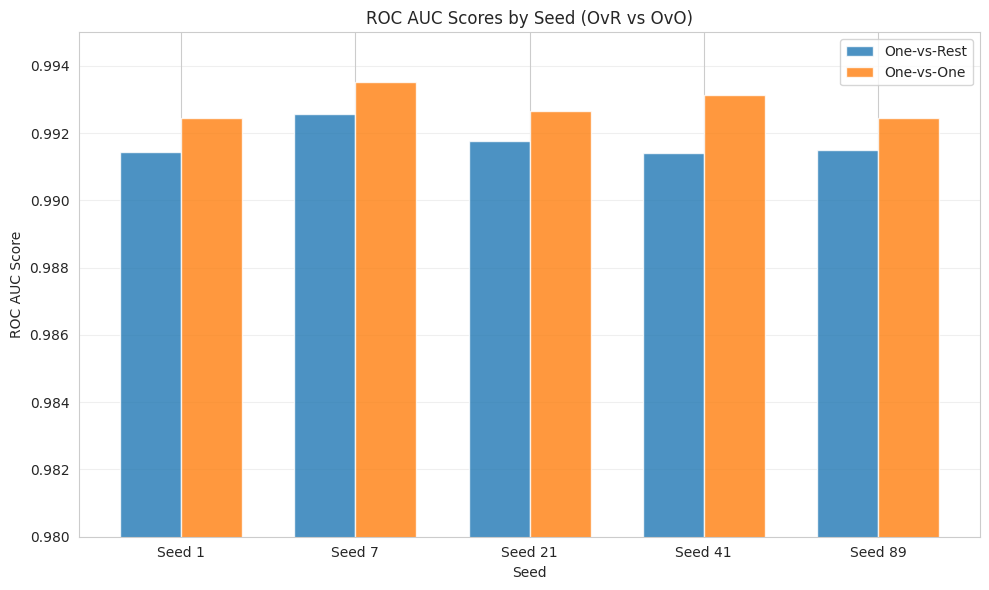


SUMMARY STATISTICS
           Metric       Mean      Std        Min        Max
         Accuracy   0.984213 0.000550   0.983327   0.984835
         F1 Macro   0.914288 0.002302   0.911221   0.917500
        Precision   0.915194 0.003148   0.912616   0.921047
           Recall   0.914348 0.002755   0.909818   0.918147
      Specificity   0.989619 0.000505   0.988893   0.990346
             Loss   0.441586 0.637807   0.036346   1.698556
    ROC AUC (OvR)   0.991734 0.000431   0.991412   0.992558
    ROC AUC (OvO)   0.992838 0.000423   0.992439   0.993514
Training Time (s) 265.194613 7.669611 254.450641 274.184734

PER-CLASS METRICS
           Class F1 (mean±std) Precision (mean±std) Recall (mean±std)
          Normal   0.992±0.000          0.991±0.001       0.993±0.001
Supraventricular   0.839±0.003          0.862±0.016       0.818±0.015
     Ventricular   0.956±0.004          0.958±0.012       0.953±0.004
          Fusion   0.795±0.011          0.770±0.021       0.822±0.027
         Un

In [181]:
output_metrics("../metrics_ECGCNN_MoE.json")

MODEL COMPARISON - AGGREGATE METRICS
                       Model        Accuracy        F1 Macro       Precision          Recall     Specificity            Loss   ROC AUC (OvR) Training Time (s) Evaluation Time (s)
          ECGCNN (8K params) 0.9665 ± 0.0059 0.8446 ± 0.0153 0.8344 ± 0.0307 0.8633 ± 0.0075 0.9799 ± 0.0010 0.0296 ± 0.0026 0.9823 ± 0.0010      42.62 ± 0.46         0.35 ± 0.02
       ECGCNN_1M (1M params) 0.9817 ± 0.0009 0.9054 ± 0.0068 0.9073 ± 0.0076 0.9051 ± 0.0130 0.9875 ± 0.0014 0.0345 ± 0.0022 0.9899 ± 0.0006      70.65 ± 0.49         0.40 ± 0.02
       ECGCNN_3M (3M params) 0.9842 ± 0.0008 0.9139 ± 0.0036 0.9228 ± 0.0060 0.9072 ± 0.0100 0.9887 ± 0.0002 0.0292 ± 0.0010 0.9922 ± 0.0007     104.12 ± 0.90         0.44 ± 0.04
       ECGCNN_4M (4M params) 0.9829 ± 0.0017 0.9089 ± 0.0068 0.9076 ± 0.0162 0.9128 ± 0.0092 0.9888 ± 0.0007 0.0301 ± 0.0020 0.9917 ± 0.0005     112.80 ± 0.30         0.48 ± 0.02
            ECGCNN_MoE (MoE) 0.9842 ± 0.0006 0.9143 ± 0.0023 0.9152 

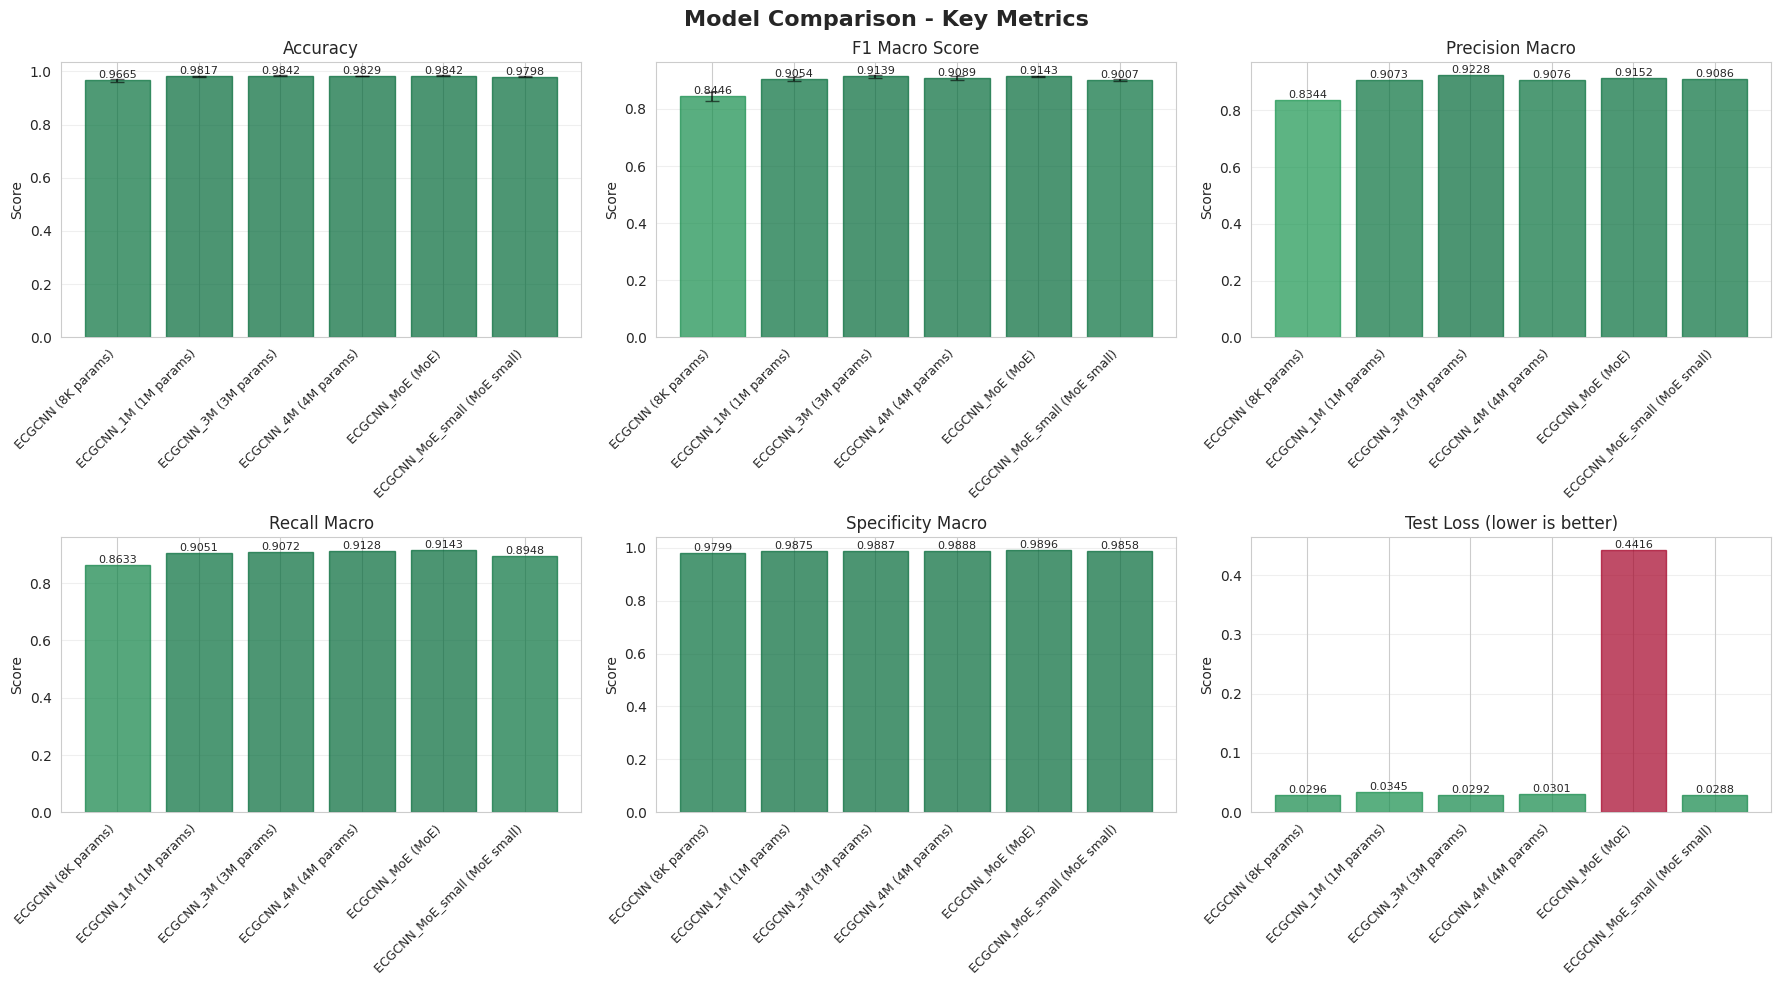

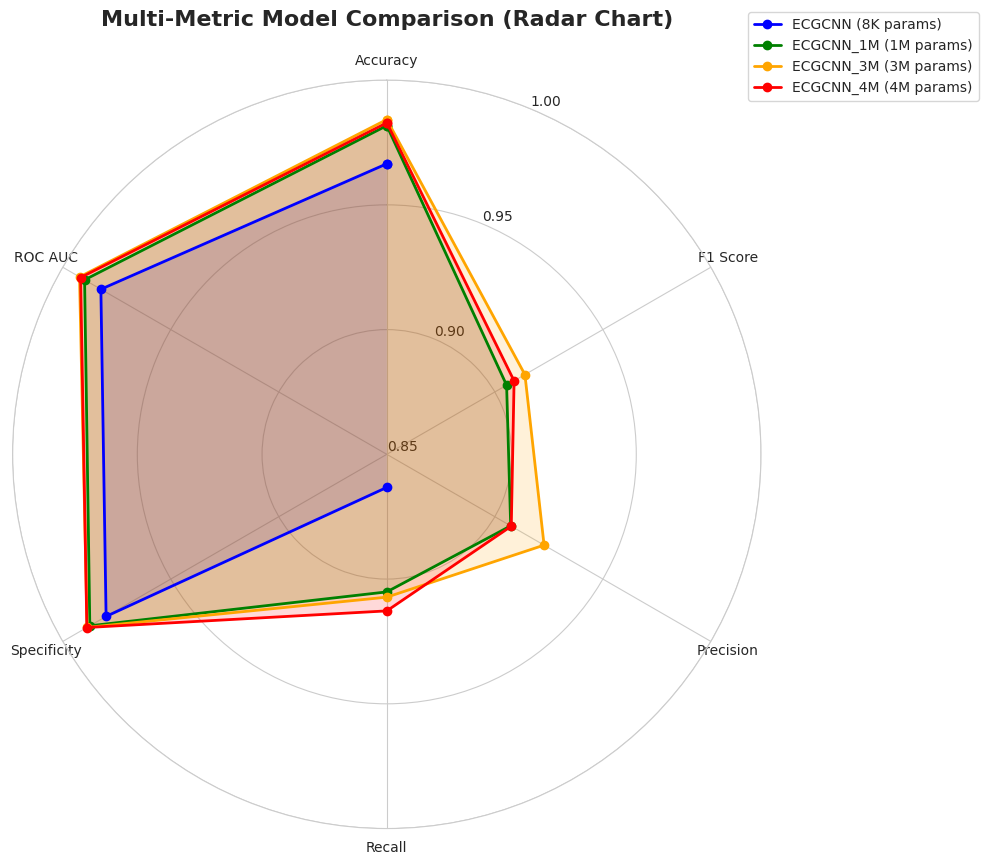

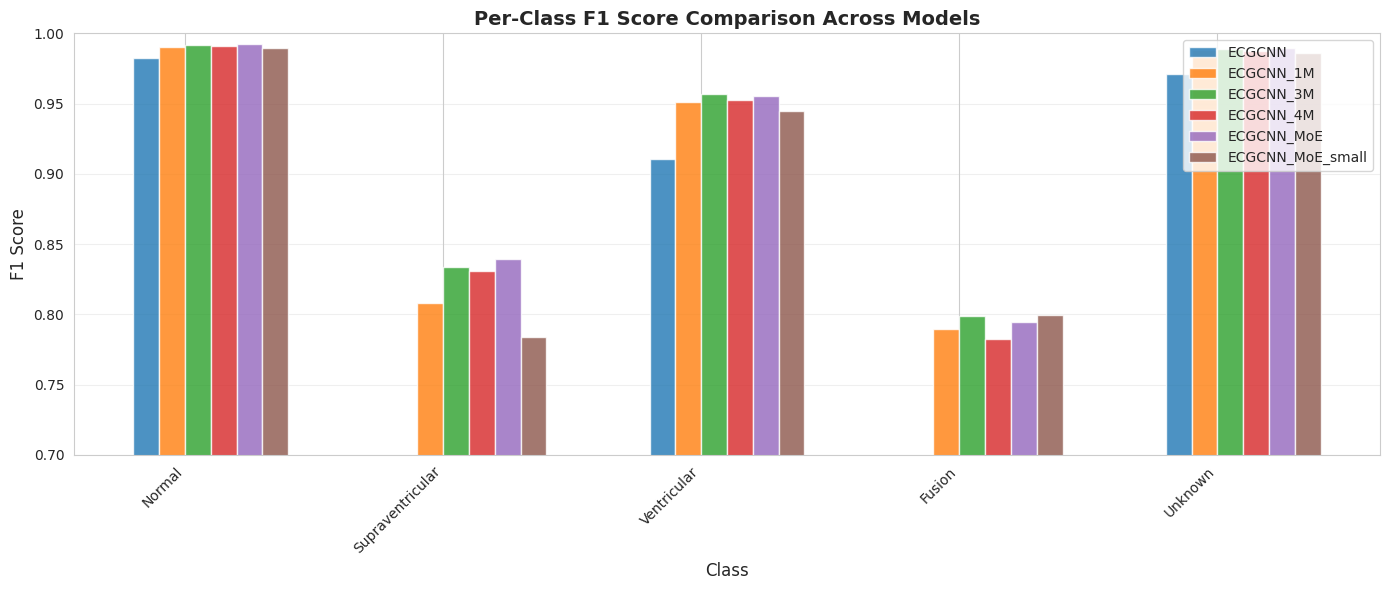

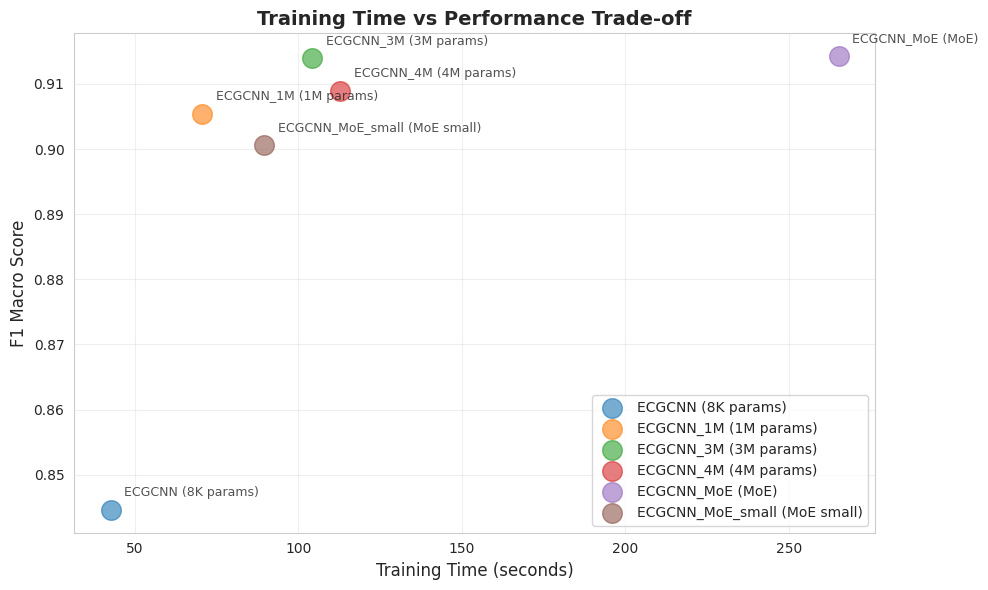

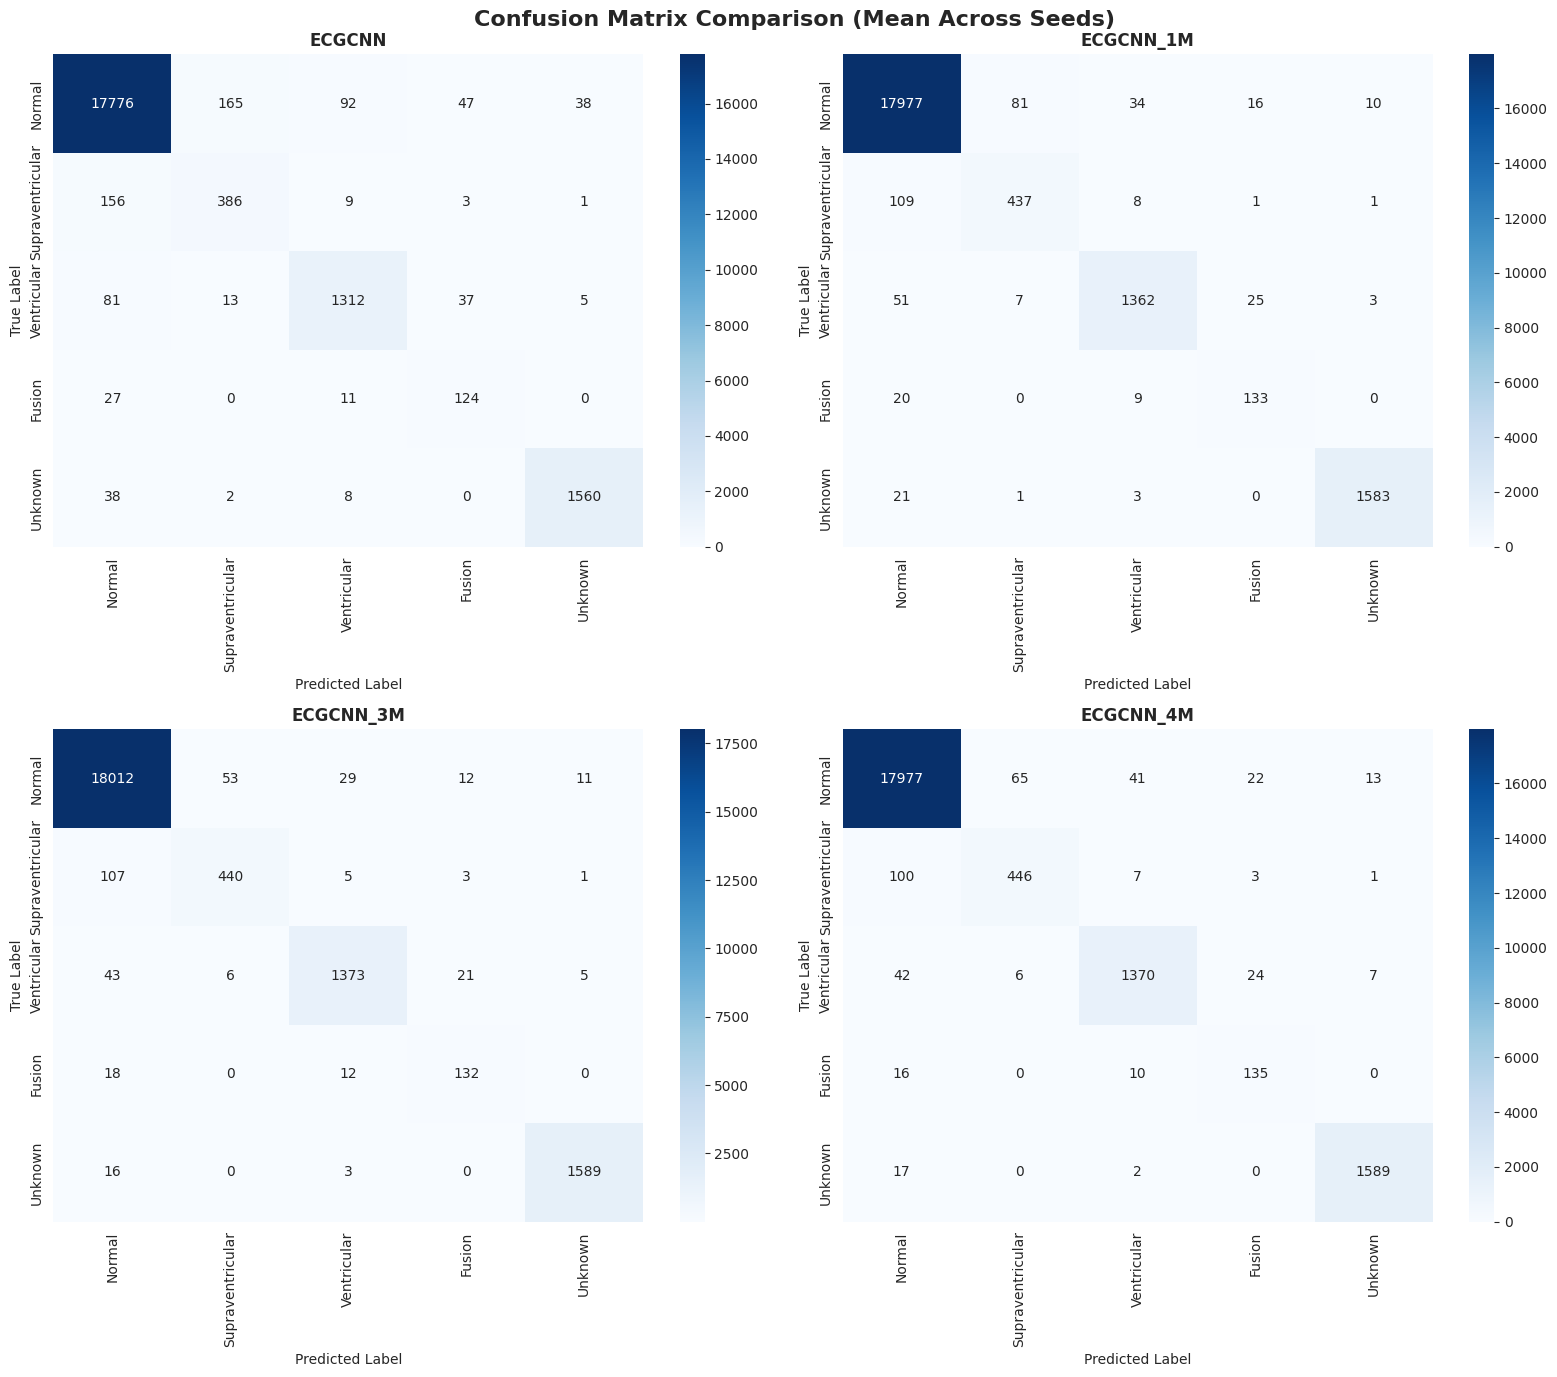


STATISTICAL SIGNIFICANCE TESTS (Wilcoxon Signed-Rank)
ECGCNN_1M vs ECGCNN: p-value = 0.0625 ns
ECGCNN_3M vs ECGCNN: p-value = 0.0625 ns
ECGCNN_4M vs ECGCNN: p-value = 0.0625 ns
ECGCNN_MoE vs ECGCNN: p-value = 0.0625 ns
ECGCNN_MoE_small vs ECGCNN: p-value = 0.0625 ns
Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant


In [185]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load all model metrics
with open("../metrics_ECGCNN.json", "r") as f:
    metrics_8k = json.load(f)
with open("../metrics_ECGCNN_1M.json", "r") as f:
    metrics_1m = json.load(f)
with open("../metrics_ECGCNN_3M.json", "r") as f:
    metrics_3m = json.load(f)
with open("../metrics_ECGCNN_4M.json", "r") as f:
    metrics_4m = json.load(f)
with open("../metrics_ECGCNN_MoE.json", "r") as f:
    metrics_moe = json.load(f)
with open("../metrics_ECGCNN_MoE_Small.json", "r") as f:
    metrics_moe_small = json.load(f)


# Function to extract aggregate statistics
def get_model_stats(metrics_data, model_name):
    """Extract mean and std for key metrics"""
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_macros = [entry["metrics"]["f1_macro"] for entry in metrics_data]
    precision_macros = [entry["metrics"]["precision_macro"] for entry in metrics_data]
    recall_macros = [entry["metrics"]["recall_macro"] for entry in metrics_data]
    specificity_macros = [
        entry["metrics"]["specificity_macro"] for entry in metrics_data
    ]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    roc_auc_ovr = [entry["metrics"]["roc_auc_ovr"] for entry in metrics_data]
    roc_auc_ovo = [entry["metrics"]["roc_auc_ovo"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]
    evaluation_times = [entry["evaluation_time"] for entry in metrics_data]

    # Get model size from config
    # model_size = sum(p.numel() for p in metrics_data[0].get("model_params", [0]))

    return {
        "Model": model_name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Accuracy_mean": np.mean(accuracies),
        "Accuracy_std": np.std(accuracies),
        "F1 Macro": f"{np.mean(f1_macros):.4f} ± {np.std(f1_macros):.4f}",
        "F1_mean": np.mean(f1_macros),
        "F1_std": np.std(f1_macros),
        "Precision": f"{np.mean(precision_macros):.4f} ± {np.std(precision_macros):.4f}",
        "Precision_mean": np.mean(precision_macros),
        "Recall": f"{np.mean(recall_macros):.4f} ± {np.std(recall_macros):.4f}",
        "Recall_mean": np.mean(recall_macros),
        "Specificity": f"{np.mean(specificity_macros):.4f} ± {np.std(specificity_macros):.4f}",
        "Specificity_mean": np.mean(specificity_macros),
        "Loss": f"{np.mean(losses):.4f} ± {np.std(losses):.4f}",
        "Loss_mean": np.mean(losses),
        "ROC AUC (OvR)": f"{np.mean(roc_auc_ovr):.4f} ± {np.std(roc_auc_ovr):.4f}",
        "ROC_OvR_mean": np.mean(roc_auc_ovr),
        "ROC AUC (OvO)": f"{np.mean(roc_auc_ovo):.4f} ± {np.std(roc_auc_ovo):.4f}",
        "ROC_OvO_mean": np.mean(roc_auc_ovo),
        "Training Time (s)": f"{np.mean(training_times):.2f} ± {np.std(training_times):.2f}",
        "Training_time_mean": np.mean(training_times),
        "Evaluation Time (s)": f"{np.mean(evaluation_times):.2f} ± {np.std(evaluation_times):.2f}",
        "Evaluation_time_mean": np.mean(evaluation_times),
    }


# Aggregate statistics for all models
comparison_data = [
    get_model_stats(metrics_8k, "ECGCNN (8K params)"),
    get_model_stats(metrics_1m, "ECGCNN_1M (1M params)"),
    get_model_stats(metrics_3m, "ECGCNN_3M (3M params)"),
    get_model_stats(metrics_4m, "ECGCNN_4M (4M params)"),
    get_model_stats(metrics_moe, "ECGCNN_MoE (MoE)"),
    get_model_stats(metrics_moe_small, "ECGCNN_MoE_small (MoE small)"),
]

# Create comparison DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display table
print("=" * 120)
print("MODEL COMPARISON - AGGREGATE METRICS")
print("=" * 120)
display_df = comparison_df[
    [
        "Model",
        "Accuracy",
        "F1 Macro",
        "Precision",
        "Recall",
        "Specificity",
        "Loss",
        "ROC AUC (OvR)",
        "Training Time (s)",
        "Evaluation Time (s)",
    ]
]
print(display_df.to_string(index=False))
print("=" * 120)

# ============================================================================
# VISUALIZATIONS
# ============================================================================

sns.set_style("whitegrid")
class_names = ["Normal", "Supraventricular", "Ventricular", "Fusion", "Unknown"]

# 1. Bar Chart Comparison of Key Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Model Comparison - Key Metrics", fontsize=16, fontweight="bold")

metrics_to_plot = [
    ("Accuracy_mean", "Accuracy_std", "Accuracy"),
    ("F1_mean", "F1_std", "F1 Macro Score"),
    ("Precision_mean", None, "Precision Macro"),
    ("Recall_mean", None, "Recall Macro"),
    ("Specificity_mean", None, "Specificity Macro"),
    ("Loss_mean", None, "Test Loss (lower is better)"),
]

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    models = comparison_df["Model"]
    means = comparison_df[mean_col]

    bars = ax.bar(range(len(models)), means, alpha=0.7)

    # Color bars by performance (green = better)
    if "Loss" not in title:
        colors = plt.cm.RdYlGn(means / means.max())
    else:
        colors = plt.cm.RdYlGn(1 - means / means.max())

    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # Add error bars if std is available
    if std_col and std_col in comparison_df.columns:
        stds = comparison_df[std_col]
        ax.errorbar(
            range(len(models)),
            means,
            yerr=stds,
            fmt="none",
            color="black",
            capsize=5,
            alpha=0.6,
        )

    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.grid(True, alpha=0.3, axis="y")

    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, means)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()

# 2. Radar Chart Comparison
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

# Metrics for radar chart
metrics_radar = [
    "Accuracy_mean",
    "F1_mean",
    "Precision_mean",
    "Recall_mean",
    "Specificity_mean",
    "ROC_OvR_mean",
]
labels = ["Accuracy", "F1 Score", "Precision", "Recall", "Specificity", "ROC AUC"]

# Number of variables
num_vars = len(metrics_radar)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot each model
colors = ["blue", "green", "orange", "red"]
for idx, (data, color) in enumerate(zip(comparison_data, colors)):
    values = [data[metric] for metric in metrics_radar]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, "o-", linewidth=2, label=data["Model"], color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

# Fix axis to go in the right order
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-axis limits
ax.set_ylim(0.85, 1.0)
ax.set_yticks([0.85, 0.90, 0.95, 1.0])
ax.set_yticklabels(["0.85", "0.90", "0.95", "1.00"])

ax.set_title(
    "Multi-Metric Model Comparison (Radar Chart)", size=16, fontweight="bold", pad=20
)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

# 3. Per-Class F1 Score Comparison
fig, ax = plt.subplots(figsize=(14, 6))

model_names = [
    "ECGCNN",
    "ECGCNN_1M",
    "ECGCNN_3M",
    "ECGCNN_4M",
    "ECGCNN_MoE",
    "ECGCNN_MoE_small",
]
all_metrics = [
    metrics_8k,
    metrics_1m,
    metrics_3m,
    metrics_4m,
    metrics_moe,
    metrics_moe_small,
]

# Extract per-class F1 scores
per_class_f1 = {}
for model_name, metrics in zip(model_names, all_metrics):
    f1_scores = [entry["metrics"]["f1_per_class"] for entry in metrics]
    mean_f1 = np.mean(f1_scores, axis=0)
    per_class_f1[model_name] = mean_f1

# Plot grouped bar chart
x = np.arange(len(class_names))
width = 0.1

for idx, (model_name, f1_scores) in enumerate(per_class_f1.items()):
    offset = (idx - 1.5) * width
    bars = ax.bar(x + offset, f1_scores, width, label=model_name, alpha=0.8)

ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title(
    "Per-Class F1 Score Comparison Across Models", fontsize=14, fontweight="bold"
)
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha="right")
ax.legend()
ax.grid(True, alpha=0.3, axis="y")
ax.set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()

# 4. Training Time vs Performance
fig, ax = plt.subplots(figsize=(10, 6))

for idx, data in enumerate(comparison_data):
    ax.scatter(
        data["Training_time_mean"],
        data["F1_mean"],
        s=200,
        alpha=0.6,
        label=data["Model"],
    )
    ax.annotate(
        data["Model"],
        (data["Training_time_mean"], data["F1_mean"]),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=9,
        alpha=0.8,
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12)
ax.set_ylabel("F1 Macro Score", fontsize=12)
ax.set_title("Training Time vs Performance Trade-off", fontsize=14, fontweight="bold")
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# 5. Confusion Matrix Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle(
    "Confusion Matrix Comparison (Mean Across Seeds)", fontsize=16, fontweight="bold"
)

for idx, (metrics, model_name, ax) in enumerate(
    zip(all_metrics, model_names, axes.flatten())
):
    confusion_matrices = [
        np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics
    ]
    mean_cm = np.mean(confusion_matrices, axis=0)

    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=ax,
    )
    ax.set_title(f"{model_name}", fontsize=12, fontweight="bold")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()

# 6. Statistical Significance Test (Wilcoxon)
from scipy import stats

print("\n" + "=" * 80)
print("STATISTICAL SIGNIFICANCE TESTS (Wilcoxon Signed-Rank)")
print("=" * 80)

# Compare each model against ECGCNN (baseline)
baseline_f1 = [entry["metrics"]["f1_macro"] for entry in metrics_8k]

for metrics, model_name in zip(
    [metrics_1m, metrics_3m, metrics_4m, metrics_moe, metrics_moe_small],
    ["ECGCNN_1M", "ECGCNN_3M", "ECGCNN_4M", "ECGCNN_MoE", "ECGCNN_MoE_small"],
):
    model_f1 = [entry["metrics"]["f1_macro"] for entry in metrics]

    if len(baseline_f1) == len(model_f1):
        statistic, p_value = stats.wilcoxon(baseline_f1, model_f1)
        significance = (
            "***"
            if p_value < 0.001
            else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        )
        print(f"{model_name} vs ECGCNN: p-value = {p_value:.4f} {significance}")
    else:
        print(f"{model_name} vs ECGCNN: Different number of seeds, cannot compare")

print("=" * 80)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 80)

# Binary Fine tuning


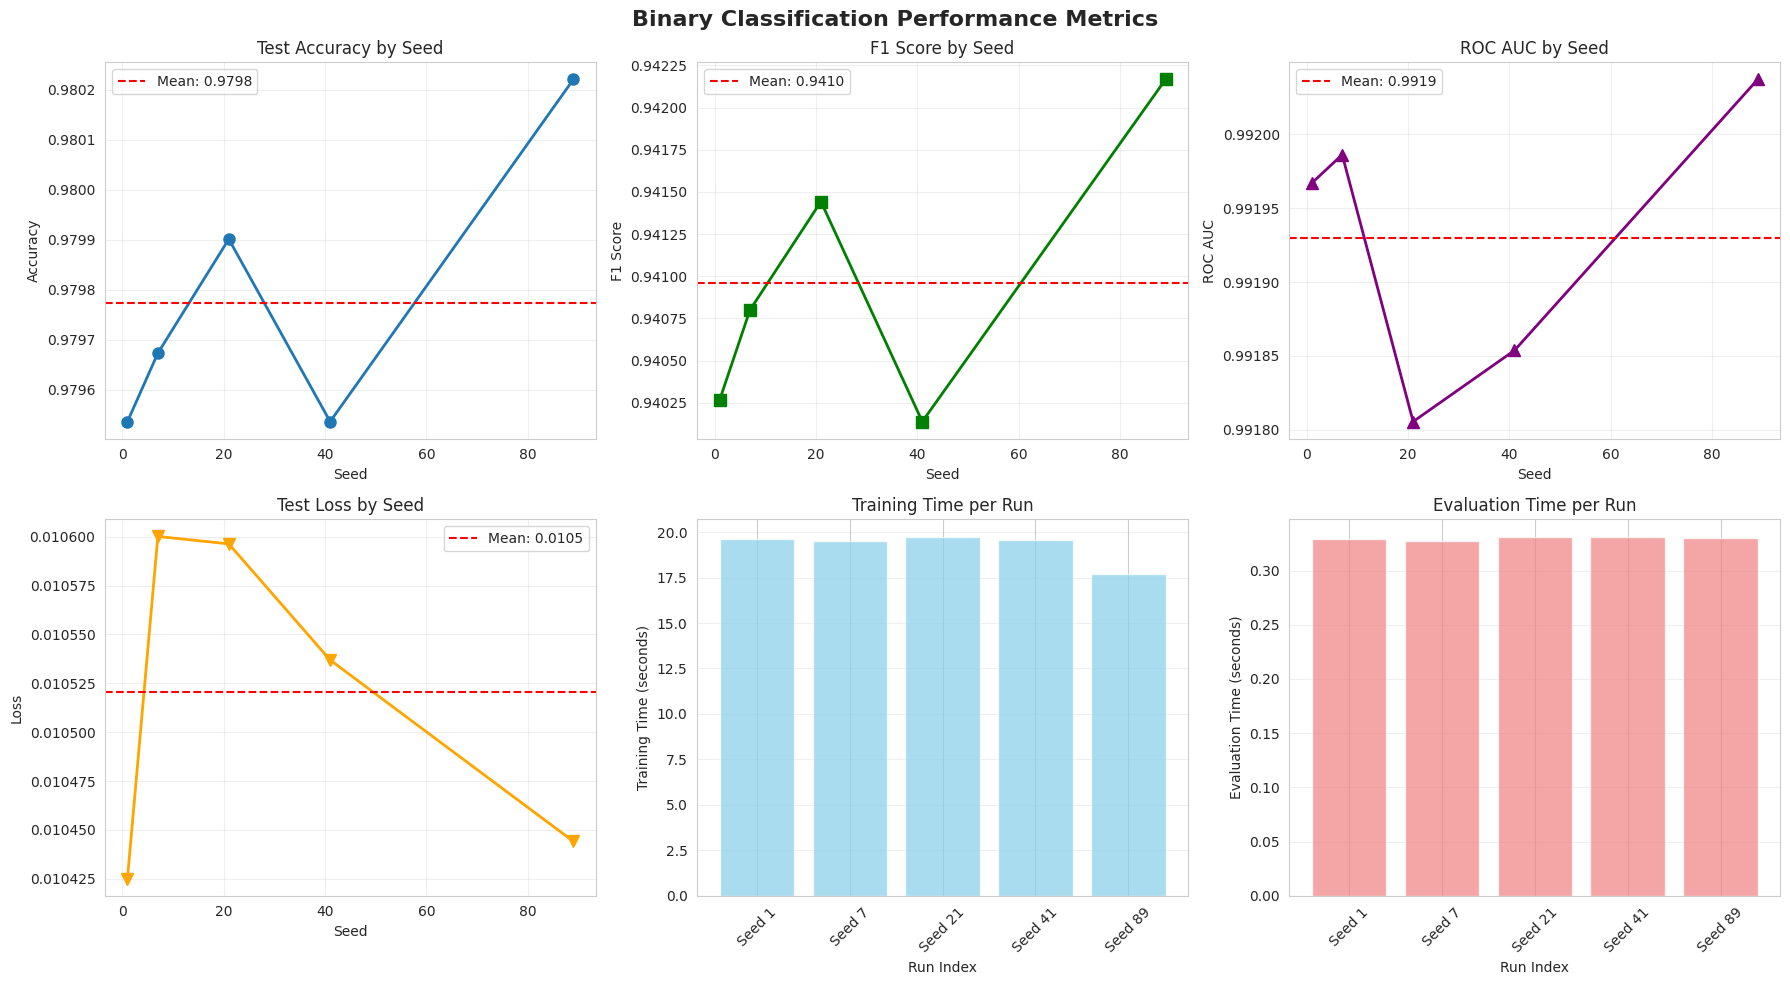

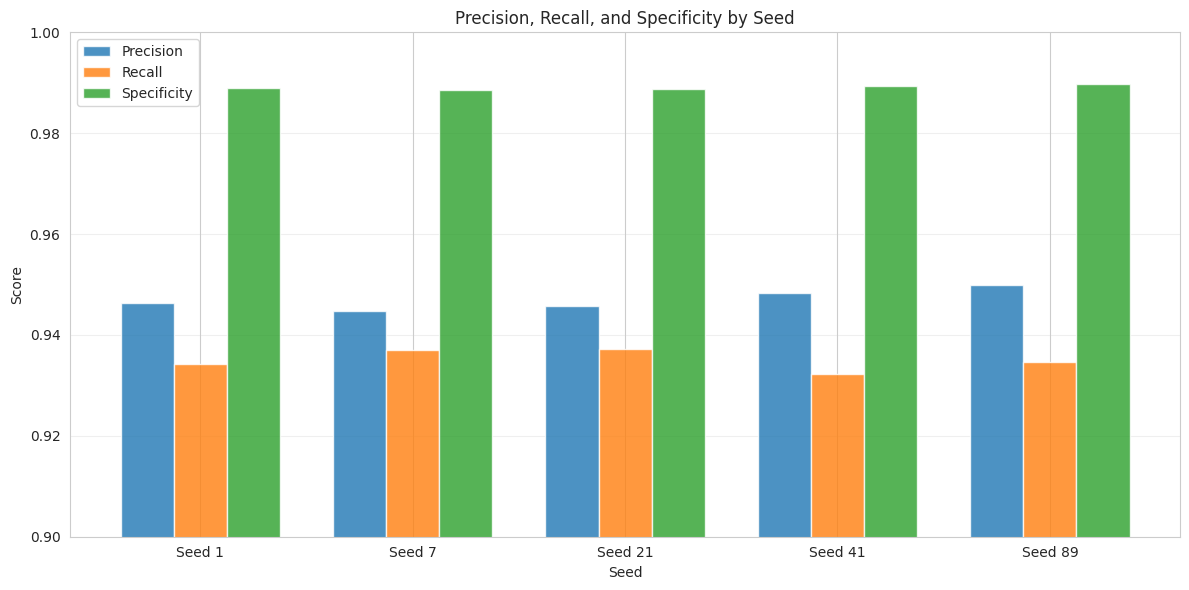

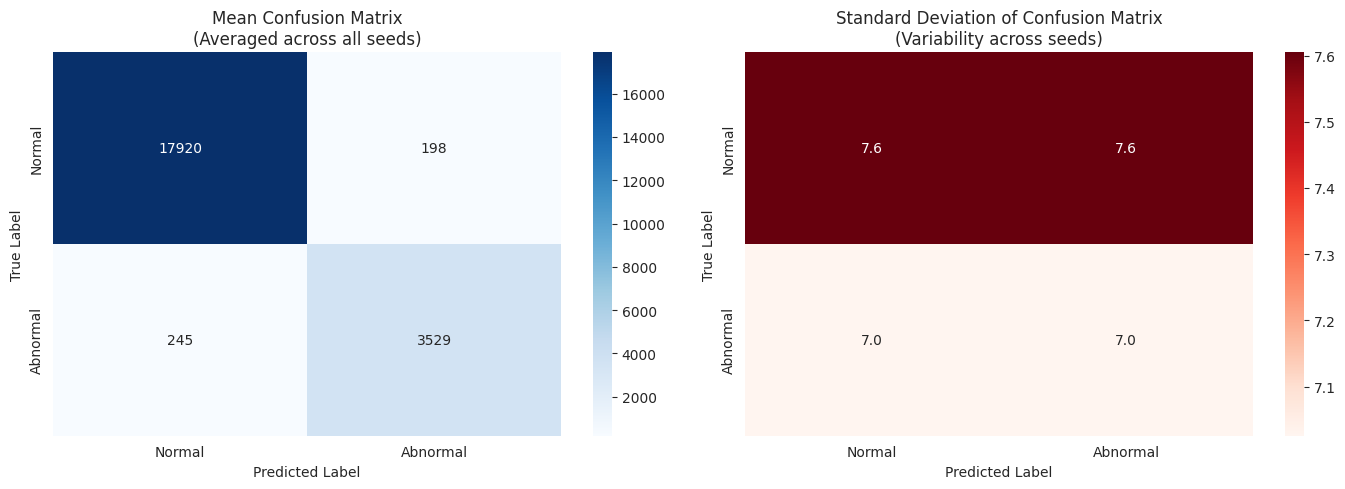


BINARY CLASSIFICATION SUMMARY STATISTICS
             Metric      Mean      Std       Min       Max
           Accuracy  0.979773 0.000261  0.979536  0.980221
           F1 Score  0.940963 0.000757  0.940139  0.942166
          Precision  0.946979 0.001865  0.944697  0.949906
             Recall  0.935029 0.001862  0.932167  0.937202
        Specificity  0.989094 0.000420  0.988575  0.989734
            ROC AUC  0.991930 0.000086  0.991806  0.992037
               Loss  0.010521 0.000074  0.010425  0.010600
  Training Time (s) 19.225530 0.760701 17.711028 19.719851
Evaluation Time (s)  0.329652 0.001182  0.327534  0.330737


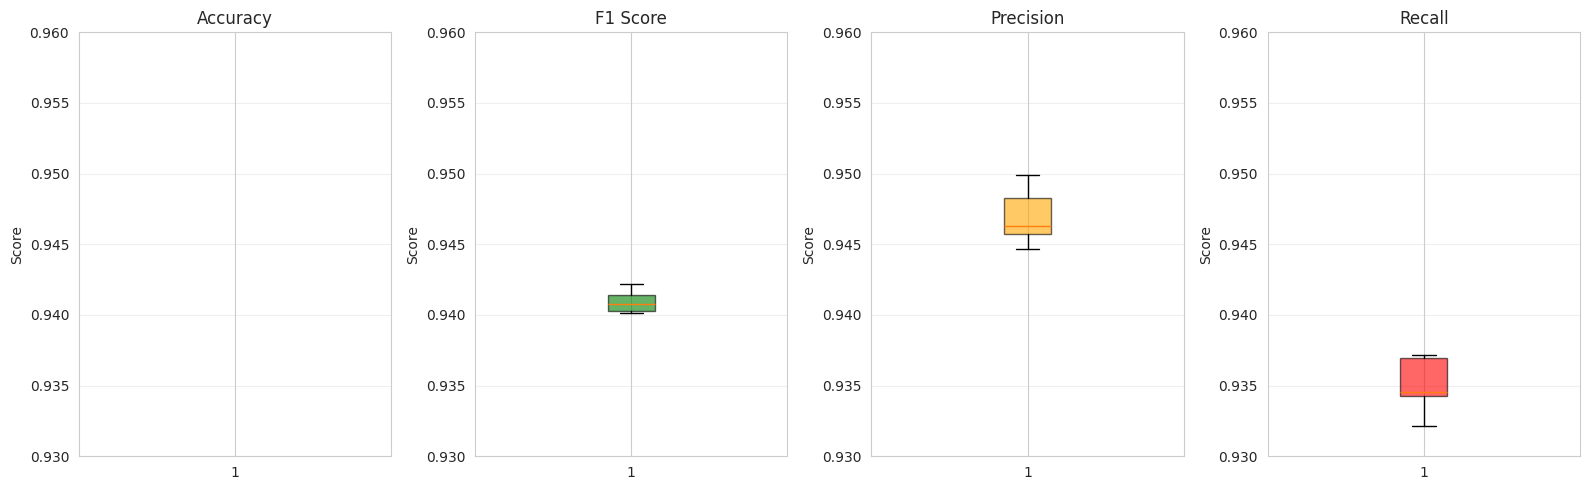

In [ ]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load all binary classification model metrics
with open("../binary_metrics_ECGCNN.json", "r") as f:
    binary_8k = json.load(f)
with open("../binary_metrics_ECGCNN_1M.json", "r") as f:
    binary_1m = json.load(f)
with open("../binary_metrics_ECGCNN_3M.json", "r") as f:
    binary_3m = json.load(f)
with open("../binary_metrics_ECGCNN_MoE.json", "r") as f:
    binary_moe = json.load(f)
with open("../binary_metrics_ECGCNN_MoE_Small.json", "r") as f:
    binary_moe_small = json.load(f)


# Function to extract binary model statistics
def get_binary_model_stats(metrics_data, model_name):
    """Extract mean and std for binary classification metrics"""
    accuracies = [entry["metrics"]["accuracy"] for entry in metrics_data]
    f1_scores = [entry["metrics"]["f1"] for entry in metrics_data]
    precisions = [entry["metrics"]["precision"] for entry in metrics_data]
    recalls = [entry["metrics"]["recall"] for entry in metrics_data]
    specificities = [entry["metrics"]["specificity"] for entry in metrics_data]
    roc_aucs = [entry["metrics"]["roc_auc"] for entry in metrics_data]
    losses = [entry["metrics"]["avg_loss"] for entry in metrics_data]
    training_times = [entry["training_time"] for entry in metrics_data]
    evaluation_times = [entry["evaluation_time"] for entry in metrics_data]

    return {
        "Model": model_name,
        "Accuracy": f"{np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}",
        "Accuracy_mean": np.mean(accuracies),
        "Accuracy_std": np.std(accuracies),
        "F1": f"{np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}",
        "F1_mean": np.mean(f1_scores),
        "F1_std": np.std(f1_scores),
        "Precision": f"{np.mean(precisions):.4f} ± {np.std(precisions):.4f}",
        "Precision_mean": np.mean(precisions),
        "Precision_std": np.std(precisions),
        "Recall": f"{np.mean(recalls):.4f} ± {np.std(recalls):.4f}",
        "Recall_mean": np.mean(recalls),
        "Recall_std": np.std(recalls),
        "Specificity": f"{np.mean(specificities):.4f} ± {np.std(specificities):.4f}",
        "Specificity_mean": np.mean(specificities),
        "Specificity_std": np.std(specificities),
        "ROC AUC": f"{np.mean(roc_aucs):.4f} ± {np.std(roc_aucs):.4f}",
        "ROC_AUC_mean": np.mean(roc_aucs),
        "ROC_AUC_std": np.std(roc_aucs),
        "Loss": f"{np.mean(losses):.4f} ± {np.std(losses):.4f}",
        "Loss_mean": np.mean(losses),
        "Loss_std": np.std(losses),
        "Training Time (s)": f"{np.mean(training_times):.2f} ± {np.std(training_times):.2f}",
        "Training_time_mean": np.mean(training_times),
        "Evaluation Time (s)": f"{np.mean(evaluation_times):.2f} ± {np.std(evaluation_times):.2f}",
        "Evaluation_time_mean": np.mean(evaluation_times),
    }


# Aggregate statistics for all binary models
binary_comparison_data = [
    get_binary_model_stats(binary_8k, "ECGCNN (8K)"),
    get_binary_model_stats(binary_1m, "ECGCNN_1M (1M)"),
    get_binary_model_stats(binary_3m, "ECGCNN_3M (3M)"),
    get_binary_model_stats(binary_moe, "ECGCNN_MoE"),
    get_binary_model_stats(binary_moe_small, "ECGCNN_MoE_Small"),
]

# Create comparison DataFrame
binary_comparison_df = pd.DataFrame(binary_comparison_data)

# Display table
print("=" * 140)
print("BINARY CLASSIFICATION MODEL COMPARISON - AGGREGATE METRICS")
print("=" * 140)
display_df = binary_comparison_df[
    [
        "Model",
        "Accuracy",
        "F1",
        "Precision",
        "Recall",
        "Specificity",
        "ROC AUC",
        "Loss",
        "Training Time (s)",
        "Evaluation Time (s)",
    ]
]
print(display_df.to_string(index=False))
print("=" * 140)

# ============================================================================
# VISUALIZATIONS
# ============================================================================

sns.set_style("whitegrid")

# 1. Bar Chart Comparison of Key Metrics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Binary Classification - Model Comparison", fontsize=16, fontweight="bold")

metrics_to_plot = [
    ("Accuracy_mean", "Accuracy_std", "Accuracy"),
    ("F1_mean", "F1_std", "F1 Score"),
    ("Precision_mean", "Precision_std", "Precision"),
    ("Recall_mean", "Recall_std", "Recall"),
    ("Specificity_mean", "Specificity_std", "Specificity"),
    ("ROC_AUC_mean", "ROC_AUC_std", "ROC AUC"),
]

for idx, (mean_col, std_col, title) in enumerate(metrics_to_plot):
    ax = axes[idx // 3, idx % 3]

    models = binary_comparison_df["Model"]
    means = binary_comparison_df[mean_col]
    stds = binary_comparison_df[std_col]

    bars = ax.bar(range(len(models)), means, alpha=0.7)

    # Color bars by performance (green = better)
    colors = plt.cm.RdYlGn(means / means.max())
    for bar, color in zip(bars, colors):
        bar.set_color(color)

    # Add error bars
    ax.errorbar(
        range(len(models)),
        means,
        yerr=stds,
        fmt="none",
        color="black",
        capsize=5,
        alpha=0.6,
    )

    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.grid(True, alpha=0.3, axis="y")

    # Add value labels on bars
    for i, (bar, val, std) in enumerate(zip(bars, means, stds)):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,
            height,
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=7,
        )

plt.tight_layout()
plt.show()

# 2. Radar Chart Comparison
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection="polar"))

# Metrics for radar chart
metrics_radar = [
    "Accuracy_mean",
    "F1_mean",
    "Precision_mean",
    "Recall_mean",
    "Specificity_mean",
    "ROC_AUC_mean",
]
labels = ["Accuracy", "F1 Score", "Precision", "Recall", "Specificity", "ROC AUC"]

# Number of variables
num_vars = len(metrics_radar)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot each model
colors = ["blue", "green", "orange", "red", "purple"]
for idx, (data, color) in enumerate(zip(binary_comparison_data, colors)):
    values = [data[metric] for metric in metrics_radar]
    values += values[:1]  # Complete the circle

    ax.plot(angles, values, "o-", linewidth=2, label=data["Model"], color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

# Fix axis to go in the right order
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Set y-axis limits
ax.set_ylim(0.90, 1.0)
ax.set_yticks([0.90, 0.93, 0.96, 0.99])
ax.set_yticklabels(["0.90", "0.93", "0.96", "0.99"])

ax.set_title(
    "Binary Classification - Multi-Metric Comparison (Radar Chart)",
    size=16,
    fontweight="bold",
    pad=20,
)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.show()

# 3. Training Time vs Performance
fig, ax = plt.subplots(figsize=(12, 7))

for idx, data in enumerate(binary_comparison_data):
    ax.scatter(
        data["Training_time_mean"],
        data["F1_mean"],
        s=300,
        alpha=0.6,
        label=data["Model"],
    )
    ax.annotate(
        data["Model"],
        (data["Training_time_mean"], data["F1_mean"]),
        xytext=(10, 10),
        textcoords="offset points",
        fontsize=10,
        alpha=0.8,
    )

ax.set_xlabel("Training Time (seconds)", fontsize=12)
ax.set_ylabel("F1 Score", fontsize=12)
ax.set_title(
    "Binary Classification - Training Time vs Performance Trade-off",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()

# 4. Confusion Matrix Comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(
    "Binary Classification - Confusion Matrix Comparison (Mean Across Seeds)",
    fontsize=16,
    fontweight="bold",
)

model_names = [
    "ECGCNN (8K)",
    "ECGCNN_1M",
    "ECGCNN_3M",
    "ECGCNN_MoE",
    "ECGCNN_MoE_Small",
]
all_binary_metrics = [binary_8k, binary_1m, binary_3m, binary_moe, binary_moe_small]

for idx, (metrics, model_name) in enumerate(zip(all_binary_metrics, model_names)):
    ax = axes[idx // 3, idx % 3]

    confusion_matrices = [
        np.array(entry["metrics"]["confusion_matrix"]) for entry in metrics
    ]
    mean_cm = np.mean(confusion_matrices, axis=0)

    sns.heatmap(
        mean_cm,
        annot=True,
        fmt=".0f",
        cmap="Blues",
        xticklabels=["Normal", "Abnormal"],
        yticklabels=["Normal", "Abnormal"],
        ax=ax,
    )
    ax.set_title(f"{model_name}", fontsize=12, fontweight="bold")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

# Hide the last subplot (we have 5 models, 2x3 grid)
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

# 5. Performance Distribution Violin Plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(
    "Binary Classification - Performance Distribution Across Seeds",
    fontsize=16,
    fontweight="bold",
)

metrics_violin = [
    ("accuracy", "Accuracy"),
    ("f1", "F1 Score"),
    ("precision", "Precision"),
    ("recall", "Recall"),
    ("specificity", "Specificity"),
    ("roc_auc", "ROC AUC"),
]

for idx, (metric_key, metric_name) in enumerate(metrics_violin):
    ax = axes[idx // 3, idx % 3]

    data_for_violin = []
    labels_for_violin = []

    for metrics, model_name in zip(all_binary_metrics, model_names):
        values = [entry["metrics"][metric_key] for entry in metrics]
        data_for_violin.append(values)
        labels_for_violin.append(model_name.split()[0])  # Shortened labels

    parts = ax.violinplot(
        data_for_violin,
        positions=range(len(model_names)),
        showmeans=True,
        showmedians=True,
    )

    ax.set_xticks(range(len(model_names)))
    ax.set_xticklabels(labels_for_violin, rotation=45, ha="right", fontsize=9)
    ax.set_ylabel("Score")
    ax.set_title(metric_name)
    ax.grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# 6. Statistical Significance Tests (Wilcoxon)
print("\n" + "=" * 80)
print("BINARY CLASSIFICATION - STATISTICAL SIGNIFICANCE TESTS (Wilcoxon Signed-Rank)")
print("=" * 80)

# Compare each model against ECGCNN (baseline)
baseline_f1 = [entry["metrics"]["f1"] for entry in binary_8k]

for metrics, model_name in zip(
    [binary_1m, binary_3m, binary_moe, binary_moe_small],
    ["ECGCNN_1M", "ECGCNN_3M", "ECGCNN_MoE", "ECGCNN_MoE_Small"],
):
    model_f1 = [entry["metrics"]["f1"] for entry in metrics]

    if len(baseline_f1) == len(model_f1):
        statistic, p_value = stats.wilcoxon(baseline_f1, model_f1)
        significance = (
            "***"
            if p_value < 0.001
            else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
        )
        print(f"{model_name} vs ECGCNN: p-value = {p_value:.4f} {significance}")
    else:
        print(f"{model_name} vs ECGCNN: Different number of seeds, cannot compare")

print("=" * 80)
print("Significance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print("=" * 80)

# 7. Loss Comparison
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(model_names))
means = binary_comparison_df["Loss_mean"]
stds = binary_comparison_df["Loss_std"]

bars = ax.bar(x, means, alpha=0.7, capsize=5)
ax.errorbar(x, means, yerr=stds, fmt="none", color="black", capsize=5, alpha=0.6)

# Color bars (lower loss = better, so invert colors)
colors = plt.cm.RdYlGn(1 - means / means.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("Loss")
ax.set_title(
    "Binary Classification - Average Loss Comparison", fontsize=14, fontweight="bold"
)
ax.grid(True, alpha=0.3, axis="y")

# Add value labels
for i, (bar, val) in enumerate(zip(bars, means)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

# 8. Efficiency Comparison (F1 Score per Second of Training)
fig, ax = plt.subplots(figsize=(12, 6))

efficiency = (
    binary_comparison_df["F1_mean"] / binary_comparison_df["Training_time_mean"]
)
x = np.arange(len(model_names))

bars = ax.bar(x, efficiency, alpha=0.7)

# Color bars
colors = plt.cm.RdYlGn(efficiency / efficiency.max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha="right")
ax.set_ylabel("F1 Score / Training Time (s)")
ax.set_title(
    "Binary Classification - Model Efficiency (F1 Score per Second)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="y")

# Add value labels
for i, (bar, val) in enumerate(zip(bars, efficiency)):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{val:.4f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()
plt.show()